### Imagenet

Largest image classification dataset at this point of time.

Url: http://image-net.org/

Our setup: classify from a set of 1000 classes.

In [4]:
#classes' names are stored here
import pickle
classes = pickle.load(open('classes.pkl','rb'))
print (classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


### Using pre-trained model: inception
Keras has a number of models for which you can use pre-trained weights. The interface is super-straightforward:

In [5]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1)
s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
import keras
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

Using TensorFlow backend.


In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 32 0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

### Predict class probabilities

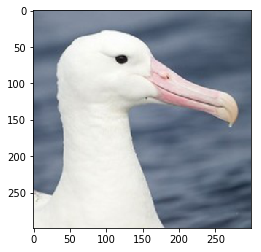

top-10 classes are:
0.9254	albatross
0.0017	turnstile
0.0008	drake
0.0005	collie
0.0005	Shetland sheepdog
0.0004	hammerhead
0.0004	nipple
0.0004	cello
0.0004	Polaroid camera


In [7]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline

img = imresize(plt.imread('sample_images/albatross.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### Having fun with pre-trained nets

In [6]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg

--2017-10-12 18:18:23--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 104.25.144.118, 104.25.143.118, 2400:cb00:2048:1::6819:8f76, ...
Connecting to cdn.com.do (cdn.com.do)|104.25.144.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49327 (48K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[=====================>]  48.17K  --.-KB/s   in 0.03s  

2017-10-12 18:18:23 (1.54 MB/s) - ‘img.jpg’ saved [49327/49327]



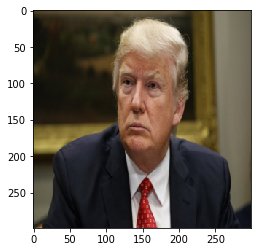

top-10 classes are:
0.2098	suit
0.0802	groom
0.0263	Windsor tie
0.0110	wig
0.0107	oboe
0.0096	academic gown
0.0068	bow tie
0.0057	notebook
0.0055	mortarboard


In [7]:
img = imresize(plt.imread('img.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### How do you reuse layers

Since model is just a sequence of layers, one can apply it as any other Keras model. Then you can build more layers on top of it, train them and maybe fine-tune "body" weights a bit.

In [8]:
from keras.models import Sequential, Model
from keras import optimizers
from keras import backend as K

In [10]:
def preproc_with_inception(path):
    
    img = imresize(plt.imread(path), (299,299))
    img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

    probs = model.predict(img_preprocessed)
    

    return np.array(probs)

# Grand-quest: Dogs Vs Cats
* original competition
* https://www.kaggle.com/c/dogs-vs-cats
* 25k JPEG images of various size, 2 classes (guess what)

### Your main objective
* In this seminar your goal is to fine-tune a pre-trained model to distinguish between the two rivaling animals
* The first step is to just reuse some network layer as features

In [1]:
!wget https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1 -O data.zip
!unzip data.zip

--2017-10-13 17:23:46--  https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/gbHhbqXdt7Nq6TBqZmDmoY0ZL9v12XggxD6OBq7DhSJjRBSEkstayEulduwJzYSl/file?dl=1 [following]
--2017-10-13 17:23:46--  https://dl.dropboxusercontent.com/content_link/gbHhbqXdt7Nq6TBqZmDmoY0ZL9v12XggxD6OBq7DhSJjRBSEkstayEulduwJzYSl/file?dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6, 2620:100:6022:6::a27d:4206
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/binary]
Saving to: ‘data.zip’

data.zip            100%[=====================>] 543.16M  9.07MB/s   in 

  inflating: train/cat.10167.jpg     
  inflating: train/cat.10168.jpg     
  inflating: train/cat.10169.jpg     
  inflating: train/cat.1017.jpg      
  inflating: train/cat.10170.jpg     
  inflating: train/cat.10171.jpg     
  inflating: train/cat.10172.jpg     
  inflating: train/cat.10173.jpg     
  inflating: train/cat.10174.jpg     
  inflating: train/cat.10175.jpg     
  inflating: train/cat.10176.jpg     
  inflating: train/cat.10177.jpg     
  inflating: train/cat.10178.jpg     
  inflating: train/cat.10179.jpg     
  inflating: train/cat.1018.jpg      
  inflating: train/cat.10180.jpg     
  inflating: train/cat.10181.jpg     
  inflating: train/cat.10182.jpg     
  inflating: train/cat.10183.jpg     
  inflating: train/cat.10184.jpg     
  inflating: train/cat.10185.jpg     
  inflating: train/cat.10186.jpg     
  inflating: train/cat.10187.jpg     
  inflating: train/cat.10188.jpg     
  inflating: train/cat.10189.jpg     
  inflating: train/cat.1019.jpg      
  inflating:

  inflating: train/cat.10556.jpg     
  inflating: train/cat.10557.jpg     
  inflating: train/cat.10558.jpg     
  inflating: train/cat.10559.jpg     
  inflating: train/cat.1056.jpg      
  inflating: train/cat.10560.jpg     
  inflating: train/cat.10561.jpg     
  inflating: train/cat.10562.jpg     
  inflating: train/cat.10563.jpg     
  inflating: train/cat.10564.jpg     
  inflating: train/cat.10565.jpg     
  inflating: train/cat.10566.jpg     
  inflating: train/cat.10567.jpg     
  inflating: train/cat.10568.jpg     
  inflating: train/cat.10569.jpg     
  inflating: train/cat.1057.jpg      
  inflating: train/cat.10570.jpg     
  inflating: train/cat.10571.jpg     
  inflating: train/cat.10572.jpg     
  inflating: train/cat.10573.jpg     
  inflating: train/cat.10574.jpg     
  inflating: train/cat.10575.jpg     
  inflating: train/cat.10576.jpg     
  inflating: train/cat.10577.jpg     
  inflating: train/cat.10578.jpg     
  inflating: train/cat.10579.jpg     
  inflating:

  inflating: train/cat.10750.jpg     
  inflating: train/cat.10751.jpg     
  inflating: train/cat.10752.jpg     
  inflating: train/cat.10753.jpg     
  inflating: train/cat.10754.jpg     
  inflating: train/cat.10755.jpg     
  inflating: train/cat.10756.jpg     
  inflating: train/cat.10757.jpg     
  inflating: train/cat.10758.jpg     
  inflating: train/cat.10759.jpg     
  inflating: train/cat.1076.jpg      
  inflating: train/cat.10760.jpg     
  inflating: train/cat.10761.jpg     
  inflating: train/cat.10762.jpg     
  inflating: train/cat.10763.jpg     
  inflating: train/cat.10764.jpg     
  inflating: train/cat.10765.jpg     
  inflating: train/cat.10766.jpg     
  inflating: train/cat.10767.jpg     
  inflating: train/cat.10768.jpg     
  inflating: train/cat.10769.jpg     
  inflating: train/cat.1077.jpg      
  inflating: train/cat.10770.jpg     
  inflating: train/cat.10771.jpg     
  inflating: train/cat.10772.jpg     
  inflating: train/cat.10773.jpg     
  inflating:

  inflating: train/cat.10945.jpg     
  inflating: train/cat.10946.jpg     
  inflating: train/cat.10947.jpg     
  inflating: train/cat.10948.jpg     
  inflating: train/cat.10949.jpg     
  inflating: train/cat.1095.jpg      
  inflating: train/cat.10950.jpg     
  inflating: train/cat.10951.jpg     
  inflating: train/cat.10952.jpg     
  inflating: train/cat.10953.jpg     
  inflating: train/cat.10954.jpg     
  inflating: train/cat.10955.jpg     
  inflating: train/cat.10956.jpg     
  inflating: train/cat.10957.jpg     
  inflating: train/cat.10958.jpg     
  inflating: train/cat.10959.jpg     
  inflating: train/cat.1096.jpg      
  inflating: train/cat.10960.jpg     
  inflating: train/cat.10961.jpg     
  inflating: train/cat.10962.jpg     
  inflating: train/cat.10963.jpg     
  inflating: train/cat.10964.jpg     
  inflating: train/cat.10965.jpg     
  inflating: train/cat.10966.jpg     
  inflating: train/cat.10967.jpg     
  inflating: train/cat.10968.jpg     
  inflating:

  inflating: train/cat.11139.jpg     
  inflating: train/cat.1114.jpg      
  inflating: train/cat.11140.jpg     
  inflating: train/cat.11141.jpg     
  inflating: train/cat.11142.jpg     
  inflating: train/cat.11143.jpg     
  inflating: train/cat.11144.jpg     
  inflating: train/cat.11145.jpg     
  inflating: train/cat.11146.jpg     
  inflating: train/cat.11147.jpg     
  inflating: train/cat.11148.jpg     
  inflating: train/cat.11149.jpg     
  inflating: train/cat.1115.jpg      
  inflating: train/cat.11150.jpg     
  inflating: train/cat.11151.jpg     
  inflating: train/cat.11152.jpg     
  inflating: train/cat.11153.jpg     
  inflating: train/cat.11154.jpg     
  inflating: train/cat.11155.jpg     
  inflating: train/cat.11156.jpg     
  inflating: train/cat.11157.jpg     
  inflating: train/cat.11158.jpg     
  inflating: train/cat.11159.jpg     
  inflating: train/cat.1116.jpg      
  inflating: train/cat.11160.jpg     
  inflating: train/cat.11161.jpg     
  inflating:

  inflating: train/cat.11333.jpg     
  inflating: train/cat.11334.jpg     
  inflating: train/cat.11335.jpg     
  inflating: train/cat.11336.jpg     
  inflating: train/cat.11337.jpg     
  inflating: train/cat.11338.jpg     
  inflating: train/cat.11339.jpg     
  inflating: train/cat.1134.jpg      
  inflating: train/cat.11340.jpg     
  inflating: train/cat.11341.jpg     
  inflating: train/cat.11342.jpg     
  inflating: train/cat.11343.jpg     
  inflating: train/cat.11344.jpg     
  inflating: train/cat.11345.jpg     
  inflating: train/cat.11346.jpg     
  inflating: train/cat.11347.jpg     
  inflating: train/cat.11348.jpg     
  inflating: train/cat.11349.jpg     
  inflating: train/cat.1135.jpg      
  inflating: train/cat.11350.jpg     
  inflating: train/cat.11351.jpg     
  inflating: train/cat.11352.jpg     
  inflating: train/cat.11353.jpg     
  inflating: train/cat.11354.jpg     
  inflating: train/cat.11355.jpg     
  inflating: train/cat.11356.jpg     
  inflating:

  inflating: train/cat.1153.jpg      
  inflating: train/cat.11530.jpg     
  inflating: train/cat.11531.jpg     
  inflating: train/cat.11532.jpg     
  inflating: train/cat.11533.jpg     
  inflating: train/cat.11534.jpg     
  inflating: train/cat.11535.jpg     
  inflating: train/cat.11536.jpg     
  inflating: train/cat.11537.jpg     
  inflating: train/cat.11538.jpg     
  inflating: train/cat.11539.jpg     
  inflating: train/cat.1154.jpg      
  inflating: train/cat.11540.jpg     
  inflating: train/cat.11541.jpg     
  inflating: train/cat.11542.jpg     
  inflating: train/cat.11543.jpg     
  inflating: train/cat.11544.jpg     
  inflating: train/cat.11545.jpg     
  inflating: train/cat.11546.jpg     
  inflating: train/cat.11547.jpg     
  inflating: train/cat.11548.jpg     
  inflating: train/cat.11549.jpg     
  inflating: train/cat.1155.jpg      
  inflating: train/cat.11550.jpg     
  inflating: train/cat.11551.jpg     
  inflating: train/cat.11552.jpg     
  inflating:

  inflating: train/cat.11726.jpg     
  inflating: train/cat.11727.jpg     
  inflating: train/cat.11728.jpg     
  inflating: train/cat.11729.jpg     
  inflating: train/cat.1173.jpg      
  inflating: train/cat.11730.jpg     
  inflating: train/cat.11731.jpg     
  inflating: train/cat.11732.jpg     
  inflating: train/cat.11733.jpg     
  inflating: train/cat.11734.jpg     
  inflating: train/cat.11735.jpg     
  inflating: train/cat.11736.jpg     
  inflating: train/cat.11737.jpg     
  inflating: train/cat.11738.jpg     
  inflating: train/cat.11739.jpg     
  inflating: train/cat.1174.jpg      
  inflating: train/cat.11740.jpg     
  inflating: train/cat.11741.jpg     
  inflating: train/cat.11742.jpg     
  inflating: train/cat.11743.jpg     
  inflating: train/cat.11744.jpg     
  inflating: train/cat.11745.jpg     
  inflating: train/cat.11746.jpg     
  inflating: train/cat.11747.jpg     
  inflating: train/cat.11748.jpg     
  inflating: train/cat.11749.jpg     
  inflating:

  inflating: train/cat.11921.jpg     
  inflating: train/cat.11922.jpg     
  inflating: train/cat.11923.jpg     
  inflating: train/cat.11924.jpg     
  inflating: train/cat.11925.jpg     
  inflating: train/cat.11926.jpg     
  inflating: train/cat.11927.jpg     
  inflating: train/cat.11928.jpg     
  inflating: train/cat.11929.jpg     
  inflating: train/cat.1193.jpg      
  inflating: train/cat.11930.jpg     
  inflating: train/cat.11931.jpg     
  inflating: train/cat.11932.jpg     
  inflating: train/cat.11933.jpg     
  inflating: train/cat.11934.jpg     
  inflating: train/cat.11935.jpg     
  inflating: train/cat.11936.jpg     
  inflating: train/cat.11937.jpg     
  inflating: train/cat.11938.jpg     
  inflating: train/cat.11939.jpg     
  inflating: train/cat.1194.jpg      
  inflating: train/cat.11940.jpg     
  inflating: train/cat.11941.jpg     
  inflating: train/cat.11942.jpg     
  inflating: train/cat.11943.jpg     
  inflating: train/cat.11944.jpg     
  inflating:

  inflating: train/cat.12308.jpg     
  inflating: train/cat.12309.jpg     
  inflating: train/cat.1231.jpg      
  inflating: train/cat.12310.jpg     
  inflating: train/cat.12311.jpg     
  inflating: train/cat.12312.jpg     
  inflating: train/cat.12313.jpg     
  inflating: train/cat.12314.jpg     
  inflating: train/cat.12315.jpg     
  inflating: train/cat.12316.jpg     
  inflating: train/cat.12317.jpg     
  inflating: train/cat.12318.jpg     
  inflating: train/cat.12319.jpg     
  inflating: train/cat.1232.jpg      
  inflating: train/cat.12320.jpg     
  inflating: train/cat.12321.jpg     
  inflating: train/cat.12322.jpg     
  inflating: train/cat.12323.jpg     
  inflating: train/cat.12324.jpg     
  inflating: train/cat.12325.jpg     
  inflating: train/cat.12326.jpg     
  inflating: train/cat.12327.jpg     
  inflating: train/cat.12328.jpg     
  inflating: train/cat.12329.jpg     
  inflating: train/cat.1233.jpg      
  inflating: train/cat.12330.jpg     
  inflating:

  inflating: train/cat.1255.jpg      
  inflating: train/cat.1256.jpg      
  inflating: train/cat.1257.jpg      
  inflating: train/cat.1258.jpg      
  inflating: train/cat.1259.jpg      
  inflating: train/cat.126.jpg       
  inflating: train/cat.1260.jpg      
  inflating: train/cat.1261.jpg      
  inflating: train/cat.1262.jpg      
  inflating: train/cat.1263.jpg      
  inflating: train/cat.1264.jpg      
  inflating: train/cat.1265.jpg      
  inflating: train/cat.1266.jpg      
  inflating: train/cat.1267.jpg      
  inflating: train/cat.1268.jpg      
  inflating: train/cat.1269.jpg      
  inflating: train/cat.127.jpg       
  inflating: train/cat.1270.jpg      
  inflating: train/cat.1271.jpg      
  inflating: train/cat.1272.jpg      
  inflating: train/cat.1273.jpg      
  inflating: train/cat.1274.jpg      
  inflating: train/cat.1275.jpg      
  inflating: train/cat.1276.jpg      
  inflating: train/cat.1277.jpg      
  inflating: train/cat.1278.jpg      
  inflating:

  inflating: train/cat.145.jpg       
  inflating: train/cat.1450.jpg      
  inflating: train/cat.1451.jpg      
  inflating: train/cat.1452.jpg      
  inflating: train/cat.1453.jpg      
  inflating: train/cat.1454.jpg      
  inflating: train/cat.1455.jpg      
  inflating: train/cat.1456.jpg      
  inflating: train/cat.1457.jpg      
  inflating: train/cat.1458.jpg      
  inflating: train/cat.1459.jpg      
  inflating: train/cat.146.jpg       
  inflating: train/cat.1460.jpg      
  inflating: train/cat.1461.jpg      
  inflating: train/cat.1462.jpg      
  inflating: train/cat.1463.jpg      
  inflating: train/cat.1464.jpg      
  inflating: train/cat.1465.jpg      
  inflating: train/cat.1466.jpg      
  inflating: train/cat.1467.jpg      
  inflating: train/cat.1468.jpg      
  inflating: train/cat.1469.jpg      
  inflating: train/cat.147.jpg       
  inflating: train/cat.1470.jpg      
  inflating: train/cat.1471.jpg      
  inflating: train/cat.1472.jpg      
  inflating:

  inflating: train/cat.1646.jpg      
  inflating: train/cat.1647.jpg      
  inflating: train/cat.1648.jpg      
  inflating: train/cat.1649.jpg      
  inflating: train/cat.165.jpg       
  inflating: train/cat.1650.jpg      
  inflating: train/cat.1651.jpg      
  inflating: train/cat.1652.jpg      
  inflating: train/cat.1653.jpg      
  inflating: train/cat.1654.jpg      
  inflating: train/cat.1655.jpg      
  inflating: train/cat.1656.jpg      
  inflating: train/cat.1657.jpg      
  inflating: train/cat.1658.jpg      
  inflating: train/cat.1659.jpg      
  inflating: train/cat.166.jpg       
  inflating: train/cat.1660.jpg      
  inflating: train/cat.1661.jpg      
  inflating: train/cat.1662.jpg      
  inflating: train/cat.1663.jpg      
  inflating: train/cat.1664.jpg      
  inflating: train/cat.1665.jpg      
  inflating: train/cat.1666.jpg      
  inflating: train/cat.1667.jpg      
  inflating: train/cat.1668.jpg      
  inflating: train/cat.1669.jpg      
  inflating:

  inflating: train/cat.2034.jpg      
  inflating: train/cat.2035.jpg      
  inflating: train/cat.2036.jpg      
  inflating: train/cat.2037.jpg      
  inflating: train/cat.2038.jpg      
  inflating: train/cat.2039.jpg      
  inflating: train/cat.204.jpg       
  inflating: train/cat.2040.jpg      
  inflating: train/cat.2041.jpg      
  inflating: train/cat.2042.jpg      
  inflating: train/cat.2043.jpg      
  inflating: train/cat.2044.jpg      
  inflating: train/cat.2045.jpg      
  inflating: train/cat.2046.jpg      
  inflating: train/cat.2047.jpg      
  inflating: train/cat.2048.jpg      
  inflating: train/cat.2049.jpg      
  inflating: train/cat.205.jpg       
  inflating: train/cat.2050.jpg      
  inflating: train/cat.2051.jpg      
  inflating: train/cat.2052.jpg      
  inflating: train/cat.2053.jpg      
  inflating: train/cat.2054.jpg      
  inflating: train/cat.2055.jpg      
  inflating: train/cat.2056.jpg      
  inflating: train/cat.2057.jpg      
  inflating:

  inflating: train/cat.2229.jpg      
  inflating: train/cat.223.jpg       
  inflating: train/cat.2230.jpg      
  inflating: train/cat.2231.jpg      
  inflating: train/cat.2232.jpg      
  inflating: train/cat.2233.jpg      
  inflating: train/cat.2234.jpg      
  inflating: train/cat.2235.jpg      
  inflating: train/cat.2236.jpg      
  inflating: train/cat.2237.jpg      
  inflating: train/cat.2238.jpg      
  inflating: train/cat.2239.jpg      
  inflating: train/cat.224.jpg       
  inflating: train/cat.2240.jpg      
  inflating: train/cat.2241.jpg      
  inflating: train/cat.2242.jpg      
  inflating: train/cat.2243.jpg      
  inflating: train/cat.2244.jpg      
  inflating: train/cat.2245.jpg      
  inflating: train/cat.2246.jpg      
  inflating: train/cat.2247.jpg      
  inflating: train/cat.2248.jpg      
  inflating: train/cat.2249.jpg      
  inflating: train/cat.225.jpg       
  inflating: train/cat.2250.jpg      
  inflating: train/cat.2251.jpg      
  inflating:

  inflating: train/cat.2426.jpg      
  inflating: train/cat.2427.jpg      
  inflating: train/cat.2428.jpg      
  inflating: train/cat.2429.jpg      
  inflating: train/cat.243.jpg       
  inflating: train/cat.2430.jpg      
  inflating: train/cat.2431.jpg      
  inflating: train/cat.2432.jpg      
  inflating: train/cat.2433.jpg      
  inflating: train/cat.2434.jpg      
  inflating: train/cat.2435.jpg      
  inflating: train/cat.2436.jpg      
  inflating: train/cat.2437.jpg      
  inflating: train/cat.2438.jpg      
  inflating: train/cat.2439.jpg      
  inflating: train/cat.244.jpg       
  inflating: train/cat.2440.jpg      
  inflating: train/cat.2441.jpg      
  inflating: train/cat.2442.jpg      
  inflating: train/cat.2443.jpg      
  inflating: train/cat.2444.jpg      
  inflating: train/cat.2445.jpg      
  inflating: train/cat.2446.jpg      
  inflating: train/cat.2447.jpg      
  inflating: train/cat.2448.jpg      
  inflating: train/cat.2449.jpg      
  inflating:

  inflating: train/cat.2623.jpg      
  inflating: train/cat.2624.jpg      
  inflating: train/cat.2625.jpg      
  inflating: train/cat.2626.jpg      
  inflating: train/cat.2627.jpg      
  inflating: train/cat.2628.jpg      
  inflating: train/cat.2629.jpg      
  inflating: train/cat.263.jpg       
  inflating: train/cat.2630.jpg      
  inflating: train/cat.2631.jpg      
  inflating: train/cat.2632.jpg      
  inflating: train/cat.2633.jpg      
  inflating: train/cat.2634.jpg      
  inflating: train/cat.2635.jpg      
  inflating: train/cat.2636.jpg      
  inflating: train/cat.2637.jpg      
  inflating: train/cat.2638.jpg      
  inflating: train/cat.2639.jpg      
  inflating: train/cat.264.jpg       
  inflating: train/cat.2640.jpg      
  inflating: train/cat.2641.jpg      
  inflating: train/cat.2642.jpg      
  inflating: train/cat.2643.jpg      
  inflating: train/cat.2644.jpg      
  inflating: train/cat.2645.jpg      
  inflating: train/cat.2646.jpg      
  inflating:

  inflating: train/cat.2820.jpg      
  inflating: train/cat.2821.jpg      
  inflating: train/cat.2822.jpg      
  inflating: train/cat.2823.jpg      
  inflating: train/cat.2824.jpg      
  inflating: train/cat.2825.jpg      
  inflating: train/cat.2826.jpg      
  inflating: train/cat.2827.jpg      
  inflating: train/cat.2828.jpg      
  inflating: train/cat.2829.jpg      
  inflating: train/cat.283.jpg       
  inflating: train/cat.2830.jpg      
  inflating: train/cat.2831.jpg      
  inflating: train/cat.2832.jpg      
  inflating: train/cat.2833.jpg      
  inflating: train/cat.2834.jpg      
  inflating: train/cat.2835.jpg      
  inflating: train/cat.2836.jpg      
  inflating: train/cat.2837.jpg      
  inflating: train/cat.2838.jpg      
  inflating: train/cat.2839.jpg      
  inflating: train/cat.284.jpg       
  inflating: train/cat.2840.jpg      
  inflating: train/cat.2841.jpg      
  inflating: train/cat.2842.jpg      
  inflating: train/cat.2843.jpg      
  inflating:

  inflating: train/cat.3015.jpg      
  inflating: train/cat.3016.jpg      
  inflating: train/cat.3017.jpg      
  inflating: train/cat.3018.jpg      
  inflating: train/cat.3019.jpg      
  inflating: train/cat.302.jpg       
  inflating: train/cat.3020.jpg      
  inflating: train/cat.3021.jpg      
  inflating: train/cat.3022.jpg      
  inflating: train/cat.3023.jpg      
  inflating: train/cat.3024.jpg      
  inflating: train/cat.3025.jpg      
  inflating: train/cat.3026.jpg      
  inflating: train/cat.3027.jpg      
  inflating: train/cat.3028.jpg      
  inflating: train/cat.3029.jpg      
  inflating: train/cat.303.jpg       
  inflating: train/cat.3030.jpg      
  inflating: train/cat.3031.jpg      
  inflating: train/cat.3032.jpg      
  inflating: train/cat.3033.jpg      
  inflating: train/cat.3034.jpg      
  inflating: train/cat.3035.jpg      
  inflating: train/cat.3036.jpg      
  inflating: train/cat.3037.jpg      
  inflating: train/cat.3038.jpg      
  inflating:

  inflating: train/cat.3211.jpg      
  inflating: train/cat.3212.jpg      
  inflating: train/cat.3213.jpg      
  inflating: train/cat.3214.jpg      
  inflating: train/cat.3215.jpg      
  inflating: train/cat.3216.jpg      
  inflating: train/cat.3217.jpg      
  inflating: train/cat.3218.jpg      
  inflating: train/cat.3219.jpg      
  inflating: train/cat.322.jpg       
  inflating: train/cat.3220.jpg      
  inflating: train/cat.3221.jpg      
  inflating: train/cat.3222.jpg      
  inflating: train/cat.3223.jpg      
  inflating: train/cat.3224.jpg      
  inflating: train/cat.3225.jpg      
  inflating: train/cat.3226.jpg      
  inflating: train/cat.3227.jpg      
  inflating: train/cat.3228.jpg      
  inflating: train/cat.3229.jpg      
  inflating: train/cat.323.jpg       
  inflating: train/cat.3230.jpg      
  inflating: train/cat.3231.jpg      
  inflating: train/cat.3232.jpg      
  inflating: train/cat.3233.jpg      
  inflating: train/cat.3234.jpg      
  inflating:

  inflating: train/cat.3408.jpg      
  inflating: train/cat.3409.jpg      
  inflating: train/cat.341.jpg       
  inflating: train/cat.3410.jpg      
  inflating: train/cat.3411.jpg      
  inflating: train/cat.3412.jpg      
  inflating: train/cat.3413.jpg      
  inflating: train/cat.3414.jpg      
  inflating: train/cat.3415.jpg      
  inflating: train/cat.3416.jpg      
  inflating: train/cat.3417.jpg      
  inflating: train/cat.3418.jpg      
  inflating: train/cat.3419.jpg      
  inflating: train/cat.342.jpg       
  inflating: train/cat.3420.jpg      
  inflating: train/cat.3421.jpg      
  inflating: train/cat.3422.jpg      
  inflating: train/cat.3423.jpg      
  inflating: train/cat.3424.jpg      
  inflating: train/cat.3425.jpg      
  inflating: train/cat.3426.jpg      
  inflating: train/cat.3427.jpg      
  inflating: train/cat.3428.jpg      
  inflating: train/cat.3429.jpg      
  inflating: train/cat.343.jpg       
  inflating: train/cat.3430.jpg      
  inflating:

  inflating: train/cat.3798.jpg      
  inflating: train/cat.3799.jpg      
  inflating: train/cat.38.jpg        
  inflating: train/cat.380.jpg       
  inflating: train/cat.3800.jpg      
  inflating: train/cat.3801.jpg      
  inflating: train/cat.3802.jpg      
  inflating: train/cat.3803.jpg      
  inflating: train/cat.3804.jpg      
  inflating: train/cat.3805.jpg      
  inflating: train/cat.3806.jpg      
  inflating: train/cat.3807.jpg      
  inflating: train/cat.3808.jpg      
  inflating: train/cat.3809.jpg      
  inflating: train/cat.381.jpg       
  inflating: train/cat.3810.jpg      
  inflating: train/cat.3811.jpg      
  inflating: train/cat.3812.jpg      
  inflating: train/cat.3813.jpg      
  inflating: train/cat.3814.jpg      
  inflating: train/cat.3815.jpg      
  inflating: train/cat.3816.jpg      
  inflating: train/cat.3817.jpg      
  inflating: train/cat.3818.jpg      
  inflating: train/cat.3819.jpg      
  inflating: train/cat.382.jpg       
  inflating:

  inflating: train/cat.3992.jpg      
  inflating: train/cat.3993.jpg      
  inflating: train/cat.3994.jpg      
  inflating: train/cat.3995.jpg      
  inflating: train/cat.3996.jpg      
  inflating: train/cat.3997.jpg      
  inflating: train/cat.3998.jpg      
  inflating: train/cat.3999.jpg      
  inflating: train/cat.4.jpg         
  inflating: train/cat.40.jpg        
  inflating: train/cat.400.jpg       
  inflating: train/cat.4000.jpg      
  inflating: train/cat.4001.jpg      
  inflating: train/cat.4002.jpg      
  inflating: train/cat.4003.jpg      
  inflating: train/cat.4004.jpg      
  inflating: train/cat.4005.jpg      
  inflating: train/cat.4006.jpg      
  inflating: train/cat.4007.jpg      
  inflating: train/cat.4008.jpg      
  inflating: train/cat.4009.jpg      
  inflating: train/cat.401.jpg       
  inflating: train/cat.4010.jpg      
  inflating: train/cat.4011.jpg      
  inflating: train/cat.4012.jpg      
  inflating: train/cat.4013.jpg      
  inflating:

  inflating: train/cat.4187.jpg      
  inflating: train/cat.4188.jpg      
  inflating: train/cat.4189.jpg      
  inflating: train/cat.419.jpg       
  inflating: train/cat.4190.jpg      
  inflating: train/cat.4191.jpg      
  inflating: train/cat.4192.jpg      
  inflating: train/cat.4193.jpg      
  inflating: train/cat.4194.jpg      
  inflating: train/cat.4195.jpg      
  inflating: train/cat.4196.jpg      
  inflating: train/cat.4197.jpg      
  inflating: train/cat.4198.jpg      
  inflating: train/cat.4199.jpg      
  inflating: train/cat.42.jpg        
  inflating: train/cat.420.jpg       
  inflating: train/cat.4200.jpg      
  inflating: train/cat.4201.jpg      
  inflating: train/cat.4202.jpg      
  inflating: train/cat.4203.jpg      
  inflating: train/cat.4204.jpg      
  inflating: train/cat.4205.jpg      
  inflating: train/cat.4206.jpg      
  inflating: train/cat.4207.jpg      
  inflating: train/cat.4208.jpg      
  inflating: train/cat.4209.jpg      
  inflating:

  inflating: train/cat.4381.jpg      
  inflating: train/cat.4382.jpg      
  inflating: train/cat.4383.jpg      
  inflating: train/cat.4384.jpg      
  inflating: train/cat.4385.jpg      
  inflating: train/cat.4386.jpg      
  inflating: train/cat.4387.jpg      
  inflating: train/cat.4388.jpg      
  inflating: train/cat.4389.jpg      
  inflating: train/cat.439.jpg       
  inflating: train/cat.4390.jpg      
  inflating: train/cat.4391.jpg      
  inflating: train/cat.4392.jpg      
  inflating: train/cat.4393.jpg      
  inflating: train/cat.4394.jpg      
  inflating: train/cat.4395.jpg      
  inflating: train/cat.4396.jpg      
  inflating: train/cat.4397.jpg      
  inflating: train/cat.4398.jpg      
  inflating: train/cat.4399.jpg      
  inflating: train/cat.44.jpg        
  inflating: train/cat.440.jpg       
  inflating: train/cat.4400.jpg      
  inflating: train/cat.4401.jpg      
  inflating: train/cat.4402.jpg      
  inflating: train/cat.4403.jpg      
  inflating:

  inflating: train/cat.4577.jpg      
  inflating: train/cat.4578.jpg      
  inflating: train/cat.4579.jpg      
  inflating: train/cat.458.jpg       
  inflating: train/cat.4580.jpg      
  inflating: train/cat.4581.jpg      
  inflating: train/cat.4582.jpg      
  inflating: train/cat.4583.jpg      
  inflating: train/cat.4584.jpg      
  inflating: train/cat.4585.jpg      
  inflating: train/cat.4586.jpg      
  inflating: train/cat.4587.jpg      
  inflating: train/cat.4588.jpg      
  inflating: train/cat.4589.jpg      
  inflating: train/cat.459.jpg       
  inflating: train/cat.4590.jpg      
  inflating: train/cat.4591.jpg      
  inflating: train/cat.4592.jpg      
  inflating: train/cat.4593.jpg      
  inflating: train/cat.4594.jpg      
  inflating: train/cat.4595.jpg      
  inflating: train/cat.4596.jpg      
  inflating: train/cat.4597.jpg      
  inflating: train/cat.4598.jpg      
  inflating: train/cat.4599.jpg      
  inflating: train/cat.46.jpg        
  inflating:

  inflating: train/cat.4773.jpg      
  inflating: train/cat.4774.jpg      
  inflating: train/cat.4775.jpg      
  inflating: train/cat.4776.jpg      
  inflating: train/cat.4777.jpg      
  inflating: train/cat.4778.jpg      
  inflating: train/cat.4779.jpg      
  inflating: train/cat.478.jpg       
  inflating: train/cat.4780.jpg      
  inflating: train/cat.4781.jpg      
  inflating: train/cat.4782.jpg      
  inflating: train/cat.4783.jpg      
  inflating: train/cat.4784.jpg      
  inflating: train/cat.4785.jpg      
  inflating: train/cat.4786.jpg      
  inflating: train/cat.4787.jpg      
  inflating: train/cat.4788.jpg      
  inflating: train/cat.4789.jpg      
  inflating: train/cat.479.jpg       
  inflating: train/cat.4790.jpg      
  inflating: train/cat.4791.jpg      
  inflating: train/cat.4792.jpg      
  inflating: train/cat.4793.jpg      
  inflating: train/cat.4794.jpg      
  inflating: train/cat.4795.jpg      
  inflating: train/cat.4796.jpg      
  inflating:

  inflating: train/cat.497.jpg       
  inflating: train/cat.4970.jpg      
  inflating: train/cat.4971.jpg      
  inflating: train/cat.4972.jpg      
  inflating: train/cat.4973.jpg      
  inflating: train/cat.4974.jpg      
  inflating: train/cat.4975.jpg      
  inflating: train/cat.4976.jpg      
  inflating: train/cat.4977.jpg      
  inflating: train/cat.4978.jpg      
  inflating: train/cat.4979.jpg      
  inflating: train/cat.498.jpg       
  inflating: train/cat.4980.jpg      
  inflating: train/cat.4981.jpg      
  inflating: train/cat.4982.jpg      
  inflating: train/cat.4983.jpg      
  inflating: train/cat.4984.jpg      
  inflating: train/cat.4985.jpg      
  inflating: train/cat.4986.jpg      
  inflating: train/cat.4987.jpg      
  inflating: train/cat.4988.jpg      
  inflating: train/cat.4989.jpg      
  inflating: train/cat.499.jpg       
  inflating: train/cat.4990.jpg      
  inflating: train/cat.4991.jpg      
  inflating: train/cat.4992.jpg      
  inflating:

  inflating: train/cat.5164.jpg      
  inflating: train/cat.5165.jpg      
  inflating: train/cat.5166.jpg      
  inflating: train/cat.5167.jpg      
  inflating: train/cat.5168.jpg      
  inflating: train/cat.5169.jpg      
  inflating: train/cat.517.jpg       
  inflating: train/cat.5170.jpg      
  inflating: train/cat.5171.jpg      
  inflating: train/cat.5172.jpg      
  inflating: train/cat.5173.jpg      
  inflating: train/cat.5174.jpg      
  inflating: train/cat.5175.jpg      
  inflating: train/cat.5176.jpg      
  inflating: train/cat.5177.jpg      
  inflating: train/cat.5178.jpg      
  inflating: train/cat.5179.jpg      
  inflating: train/cat.518.jpg       
  inflating: train/cat.5180.jpg      
  inflating: train/cat.5181.jpg      
  inflating: train/cat.5182.jpg      
  inflating: train/cat.5183.jpg      
  inflating: train/cat.5184.jpg      
  inflating: train/cat.5185.jpg      
  inflating: train/cat.5186.jpg      
  inflating: train/cat.5187.jpg      
  inflating:

  inflating: train/cat.5553.jpg      
  inflating: train/cat.5554.jpg      
  inflating: train/cat.5555.jpg      
  inflating: train/cat.5556.jpg      
  inflating: train/cat.5557.jpg      
  inflating: train/cat.5558.jpg      
  inflating: train/cat.5559.jpg      
  inflating: train/cat.556.jpg       
  inflating: train/cat.5560.jpg      
  inflating: train/cat.5561.jpg      
  inflating: train/cat.5562.jpg      
  inflating: train/cat.5563.jpg      
  inflating: train/cat.5564.jpg      
  inflating: train/cat.5565.jpg      
  inflating: train/cat.5566.jpg      
  inflating: train/cat.5567.jpg      
  inflating: train/cat.5568.jpg      
  inflating: train/cat.5569.jpg      
  inflating: train/cat.557.jpg       
  inflating: train/cat.5570.jpg      
  inflating: train/cat.5571.jpg      
  inflating: train/cat.5572.jpg      
  inflating: train/cat.5573.jpg      
  inflating: train/cat.5574.jpg      
  inflating: train/cat.5575.jpg      
  inflating: train/cat.5576.jpg      
  inflating:

  inflating: train/cat.5748.jpg      
  inflating: train/cat.5749.jpg      
  inflating: train/cat.575.jpg       
  inflating: train/cat.5750.jpg      
  inflating: train/cat.5751.jpg      
  inflating: train/cat.5752.jpg      
  inflating: train/cat.5753.jpg      
  inflating: train/cat.5754.jpg      
  inflating: train/cat.5755.jpg      
  inflating: train/cat.5756.jpg      
  inflating: train/cat.5757.jpg      
  inflating: train/cat.5758.jpg      
  inflating: train/cat.5759.jpg      
  inflating: train/cat.576.jpg       
  inflating: train/cat.5760.jpg      
  inflating: train/cat.5761.jpg      
  inflating: train/cat.5762.jpg      
  inflating: train/cat.5763.jpg      
  inflating: train/cat.5764.jpg      
  inflating: train/cat.5765.jpg      
  inflating: train/cat.5766.jpg      
  inflating: train/cat.5767.jpg      
  inflating: train/cat.5768.jpg      
  inflating: train/cat.5769.jpg      
  inflating: train/cat.577.jpg       
  inflating: train/cat.5770.jpg      
  inflating:

  inflating: train/cat.5943.jpg      
  inflating: train/cat.5944.jpg      
  inflating: train/cat.5945.jpg      
  inflating: train/cat.5946.jpg      
  inflating: train/cat.5947.jpg      
  inflating: train/cat.5948.jpg      
  inflating: train/cat.5949.jpg      
  inflating: train/cat.595.jpg       
  inflating: train/cat.5950.jpg      
  inflating: train/cat.5951.jpg      
  inflating: train/cat.5952.jpg      
  inflating: train/cat.5953.jpg      
  inflating: train/cat.5954.jpg      
  inflating: train/cat.5955.jpg      
  inflating: train/cat.5956.jpg      
  inflating: train/cat.5957.jpg      
  inflating: train/cat.5958.jpg      
  inflating: train/cat.5959.jpg      
  inflating: train/cat.596.jpg       
  inflating: train/cat.5960.jpg      
  inflating: train/cat.5961.jpg      
  inflating: train/cat.5962.jpg      
  inflating: train/cat.5963.jpg      
  inflating: train/cat.5964.jpg      
  inflating: train/cat.5965.jpg      
  inflating: train/cat.5966.jpg      
  inflating:

  inflating: train/cat.6138.jpg      
  inflating: train/cat.6139.jpg      
  inflating: train/cat.614.jpg       
  inflating: train/cat.6140.jpg      
  inflating: train/cat.6141.jpg      
  inflating: train/cat.6142.jpg      
  inflating: train/cat.6143.jpg      
  inflating: train/cat.6144.jpg      
  inflating: train/cat.6145.jpg      
  inflating: train/cat.6146.jpg      
  inflating: train/cat.6147.jpg      
  inflating: train/cat.6148.jpg      
  inflating: train/cat.6149.jpg      
  inflating: train/cat.615.jpg       
  inflating: train/cat.6150.jpg      
  inflating: train/cat.6151.jpg      
  inflating: train/cat.6152.jpg      
  inflating: train/cat.6153.jpg      
  inflating: train/cat.6154.jpg      
  inflating: train/cat.6155.jpg      
  inflating: train/cat.6156.jpg      
  inflating: train/cat.6157.jpg      
  inflating: train/cat.6158.jpg      
  inflating: train/cat.6159.jpg      
  inflating: train/cat.616.jpg       
  inflating: train/cat.6160.jpg      
  inflating:

  inflating: train/cat.6333.jpg      
  inflating: train/cat.6334.jpg      
  inflating: train/cat.6335.jpg      
  inflating: train/cat.6336.jpg      
  inflating: train/cat.6337.jpg      
  inflating: train/cat.6338.jpg      
  inflating: train/cat.6339.jpg      
  inflating: train/cat.634.jpg       
  inflating: train/cat.6340.jpg      
  inflating: train/cat.6341.jpg      
  inflating: train/cat.6342.jpg      
  inflating: train/cat.6343.jpg      
  inflating: train/cat.6344.jpg      
  inflating: train/cat.6345.jpg      
  inflating: train/cat.6346.jpg      
  inflating: train/cat.6347.jpg      
  inflating: train/cat.6348.jpg      
  inflating: train/cat.6349.jpg      
  inflating: train/cat.635.jpg       
  inflating: train/cat.6350.jpg      
  inflating: train/cat.6351.jpg      
  inflating: train/cat.6352.jpg      
  inflating: train/cat.6353.jpg      
  inflating: train/cat.6354.jpg      
  inflating: train/cat.6355.jpg      
  inflating: train/cat.6356.jpg      
  inflating:

  inflating: train/cat.6530.jpg      
  inflating: train/cat.6531.jpg      
  inflating: train/cat.6532.jpg      
  inflating: train/cat.6533.jpg      
  inflating: train/cat.6534.jpg      
  inflating: train/cat.6535.jpg      
  inflating: train/cat.6536.jpg      
  inflating: train/cat.6537.jpg      
  inflating: train/cat.6538.jpg      
  inflating: train/cat.6539.jpg      
  inflating: train/cat.654.jpg       
  inflating: train/cat.6540.jpg      
  inflating: train/cat.6541.jpg      
  inflating: train/cat.6542.jpg      
  inflating: train/cat.6543.jpg      
  inflating: train/cat.6544.jpg      
  inflating: train/cat.6545.jpg      
  inflating: train/cat.6546.jpg      
  inflating: train/cat.6547.jpg      
  inflating: train/cat.6548.jpg      
  inflating: train/cat.6549.jpg      
  inflating: train/cat.655.jpg       
  inflating: train/cat.6550.jpg      
  inflating: train/cat.6551.jpg      
  inflating: train/cat.6552.jpg      
  inflating: train/cat.6553.jpg      
  inflating:

  inflating: train/cat.6919.jpg      
  inflating: train/cat.692.jpg       
  inflating: train/cat.6920.jpg      
  inflating: train/cat.6921.jpg      
  inflating: train/cat.6922.jpg      
  inflating: train/cat.6923.jpg      
  inflating: train/cat.6924.jpg      
  inflating: train/cat.6925.jpg      
  inflating: train/cat.6926.jpg      
  inflating: train/cat.6927.jpg      
  inflating: train/cat.6928.jpg      
  inflating: train/cat.6929.jpg      
  inflating: train/cat.693.jpg       
  inflating: train/cat.6930.jpg      
  inflating: train/cat.6931.jpg      
  inflating: train/cat.6932.jpg      
  inflating: train/cat.6933.jpg      
  inflating: train/cat.6934.jpg      
  inflating: train/cat.6935.jpg      
  inflating: train/cat.6936.jpg      
  inflating: train/cat.6937.jpg      
  inflating: train/cat.6938.jpg      
  inflating: train/cat.6939.jpg      
  inflating: train/cat.694.jpg       
  inflating: train/cat.6940.jpg      
  inflating: train/cat.6941.jpg      
  inflating:

  inflating: train/cat.7113.jpg      
  inflating: train/cat.7114.jpg      
  inflating: train/cat.7115.jpg      
  inflating: train/cat.7116.jpg      
  inflating: train/cat.7117.jpg      
  inflating: train/cat.7118.jpg      
  inflating: train/cat.7119.jpg      
  inflating: train/cat.712.jpg       
  inflating: train/cat.7120.jpg      
  inflating: train/cat.7121.jpg      
  inflating: train/cat.7122.jpg      
  inflating: train/cat.7123.jpg      
  inflating: train/cat.7124.jpg      
  inflating: train/cat.7125.jpg      
  inflating: train/cat.7126.jpg      
  inflating: train/cat.7127.jpg      
  inflating: train/cat.7128.jpg      
  inflating: train/cat.7129.jpg      
  inflating: train/cat.713.jpg       
  inflating: train/cat.7130.jpg      
  inflating: train/cat.7131.jpg      
  inflating: train/cat.7132.jpg      
  inflating: train/cat.7133.jpg      
  inflating: train/cat.7134.jpg      
  inflating: train/cat.7135.jpg      
  inflating: train/cat.7136.jpg      
  inflating:

  inflating: train/cat.7502.jpg      
  inflating: train/cat.7503.jpg      
  inflating: train/cat.7504.jpg      
  inflating: train/cat.7505.jpg      
  inflating: train/cat.7506.jpg      
  inflating: train/cat.7507.jpg      
  inflating: train/cat.7508.jpg      
  inflating: train/cat.7509.jpg      
  inflating: train/cat.751.jpg       
  inflating: train/cat.7510.jpg      
  inflating: train/cat.7511.jpg      
  inflating: train/cat.7512.jpg      
  inflating: train/cat.7513.jpg      
  inflating: train/cat.7514.jpg      
  inflating: train/cat.7515.jpg      
  inflating: train/cat.7516.jpg      
  inflating: train/cat.7517.jpg      
  inflating: train/cat.7518.jpg      
  inflating: train/cat.7519.jpg      
  inflating: train/cat.752.jpg       
  inflating: train/cat.7520.jpg      
  inflating: train/cat.7521.jpg      
  inflating: train/cat.7522.jpg      
  inflating: train/cat.7523.jpg      
  inflating: train/cat.7524.jpg      
  inflating: train/cat.7525.jpg      
  inflating:

  inflating: train/cat.7699.jpg      
  inflating: train/cat.77.jpg        
  inflating: train/cat.770.jpg       
  inflating: train/cat.7700.jpg      
  inflating: train/cat.7701.jpg      
  inflating: train/cat.7702.jpg      
  inflating: train/cat.7703.jpg      
  inflating: train/cat.7704.jpg      
  inflating: train/cat.7705.jpg      
  inflating: train/cat.7706.jpg      
  inflating: train/cat.7707.jpg      
  inflating: train/cat.7708.jpg      
  inflating: train/cat.7709.jpg      
  inflating: train/cat.771.jpg       
  inflating: train/cat.7710.jpg      
  inflating: train/cat.7711.jpg      
  inflating: train/cat.7712.jpg      
  inflating: train/cat.7713.jpg      
  inflating: train/cat.7714.jpg      
  inflating: train/cat.7715.jpg      
  inflating: train/cat.7716.jpg      
  inflating: train/cat.7717.jpg      
  inflating: train/cat.7718.jpg      
  inflating: train/cat.7719.jpg      
  inflating: train/cat.772.jpg       
  inflating: train/cat.7720.jpg      
  inflating:

  inflating: train/cat.7893.jpg      
  inflating: train/cat.7894.jpg      
  inflating: train/cat.7895.jpg      
  inflating: train/cat.7896.jpg      
  inflating: train/cat.7897.jpg      
  inflating: train/cat.7898.jpg      
  inflating: train/cat.7899.jpg      
  inflating: train/cat.79.jpg        
  inflating: train/cat.790.jpg       
  inflating: train/cat.7900.jpg      
  inflating: train/cat.7901.jpg      
  inflating: train/cat.7902.jpg      
  inflating: train/cat.7903.jpg      
  inflating: train/cat.7904.jpg      
  inflating: train/cat.7905.jpg      
  inflating: train/cat.7906.jpg      
  inflating: train/cat.7907.jpg      
  inflating: train/cat.7908.jpg      
  inflating: train/cat.7909.jpg      
  inflating: train/cat.791.jpg       
  inflating: train/cat.7910.jpg      
  inflating: train/cat.7911.jpg      
  inflating: train/cat.7912.jpg      
  inflating: train/cat.7913.jpg      
  inflating: train/cat.7914.jpg      
  inflating: train/cat.7915.jpg      
  inflating:

  inflating: train/cat.8087.jpg      
  inflating: train/cat.8088.jpg      
  inflating: train/cat.8089.jpg      
  inflating: train/cat.809.jpg       
  inflating: train/cat.8090.jpg      
  inflating: train/cat.8091.jpg      
  inflating: train/cat.8092.jpg      
  inflating: train/cat.8093.jpg      
  inflating: train/cat.8094.jpg      
  inflating: train/cat.8095.jpg      
  inflating: train/cat.8096.jpg      
  inflating: train/cat.8097.jpg      
  inflating: train/cat.8098.jpg      
  inflating: train/cat.8099.jpg      
  inflating: train/cat.81.jpg        
  inflating: train/cat.810.jpg       
  inflating: train/cat.8100.jpg      
  inflating: train/cat.8101.jpg      
  inflating: train/cat.8102.jpg      
  inflating: train/cat.8103.jpg      
  inflating: train/cat.8104.jpg      
  inflating: train/cat.8105.jpg      
  inflating: train/cat.8106.jpg      
  inflating: train/cat.8107.jpg      
  inflating: train/cat.8108.jpg      
  inflating: train/cat.8109.jpg      
  inflating:

  inflating: train/cat.8281.jpg      
  inflating: train/cat.8282.jpg      
  inflating: train/cat.8283.jpg      
  inflating: train/cat.8284.jpg      
  inflating: train/cat.8285.jpg      
  inflating: train/cat.8286.jpg      
  inflating: train/cat.8287.jpg      
  inflating: train/cat.8288.jpg      
  inflating: train/cat.8289.jpg      
  inflating: train/cat.829.jpg       
  inflating: train/cat.8290.jpg      
  inflating: train/cat.8291.jpg      
  inflating: train/cat.8292.jpg      
  inflating: train/cat.8293.jpg      
  inflating: train/cat.8294.jpg      
  inflating: train/cat.8295.jpg      
  inflating: train/cat.8296.jpg      
  inflating: train/cat.8297.jpg      
  inflating: train/cat.8298.jpg      
  inflating: train/cat.8299.jpg      
  inflating: train/cat.83.jpg        
  inflating: train/cat.830.jpg       
  inflating: train/cat.8300.jpg      
  inflating: train/cat.8301.jpg      
  inflating: train/cat.8302.jpg      
  inflating: train/cat.8303.jpg      
  inflating:

  inflating: train/cat.867.jpg       
  inflating: train/cat.8670.jpg      
  inflating: train/cat.8671.jpg      
  inflating: train/cat.8672.jpg      
  inflating: train/cat.8673.jpg      
  inflating: train/cat.8674.jpg      
  inflating: train/cat.8675.jpg      
  inflating: train/cat.8676.jpg      
  inflating: train/cat.8677.jpg      
  inflating: train/cat.8678.jpg      
  inflating: train/cat.8679.jpg      
  inflating: train/cat.868.jpg       
  inflating: train/cat.8680.jpg      
  inflating: train/cat.8681.jpg      
  inflating: train/cat.8682.jpg      
  inflating: train/cat.8683.jpg      
  inflating: train/cat.8684.jpg      
  inflating: train/cat.8685.jpg      
  inflating: train/cat.8686.jpg      
  inflating: train/cat.8687.jpg      
  inflating: train/cat.8688.jpg      
  inflating: train/cat.8689.jpg      
  inflating: train/cat.869.jpg       
  inflating: train/cat.8690.jpg      
  inflating: train/cat.8691.jpg      
  inflating: train/cat.8692.jpg      
  inflating:

  inflating: train/cat.8864.jpg      
  inflating: train/cat.8865.jpg      
  inflating: train/cat.8866.jpg      
  inflating: train/cat.8867.jpg      
  inflating: train/cat.8868.jpg      
  inflating: train/cat.8869.jpg      
  inflating: train/cat.887.jpg       
  inflating: train/cat.8870.jpg      
  inflating: train/cat.8871.jpg      
  inflating: train/cat.8872.jpg      
  inflating: train/cat.8873.jpg      
  inflating: train/cat.8874.jpg      
  inflating: train/cat.8875.jpg      
  inflating: train/cat.8876.jpg      
  inflating: train/cat.8877.jpg      
  inflating: train/cat.8878.jpg      
  inflating: train/cat.8879.jpg      
  inflating: train/cat.888.jpg       
  inflating: train/cat.8880.jpg      
  inflating: train/cat.8881.jpg      
  inflating: train/cat.8882.jpg      
  inflating: train/cat.8883.jpg      
  inflating: train/cat.8884.jpg      
  inflating: train/cat.8885.jpg      
  inflating: train/cat.8886.jpg      
  inflating: train/cat.8887.jpg      
  inflating:

  inflating: train/cat.9058.jpg      
  inflating: train/cat.9059.jpg      
  inflating: train/cat.906.jpg       
  inflating: train/cat.9060.jpg      
  inflating: train/cat.9061.jpg      
  inflating: train/cat.9062.jpg      
  inflating: train/cat.9063.jpg      
  inflating: train/cat.9064.jpg      
  inflating: train/cat.9065.jpg      
  inflating: train/cat.9066.jpg      
  inflating: train/cat.9067.jpg      
  inflating: train/cat.9068.jpg      
  inflating: train/cat.9069.jpg      
  inflating: train/cat.907.jpg       
  inflating: train/cat.9070.jpg      
  inflating: train/cat.9071.jpg      
  inflating: train/cat.9072.jpg      
  inflating: train/cat.9073.jpg      
  inflating: train/cat.9074.jpg      
  inflating: train/cat.9075.jpg      
  inflating: train/cat.9076.jpg      
  inflating: train/cat.9077.jpg      
  inflating: train/cat.9078.jpg      
  inflating: train/cat.9079.jpg      
  inflating: train/cat.908.jpg       
  inflating: train/cat.9080.jpg      
  inflating:

  inflating: train/cat.9445.jpg      
  inflating: train/cat.9446.jpg      
  inflating: train/cat.9447.jpg      
  inflating: train/cat.9448.jpg      
  inflating: train/cat.9449.jpg      
  inflating: train/cat.945.jpg       
  inflating: train/cat.9450.jpg      
  inflating: train/cat.9451.jpg      
  inflating: train/cat.9452.jpg      
  inflating: train/cat.9453.jpg      
  inflating: train/cat.9454.jpg      
  inflating: train/cat.9455.jpg      
  inflating: train/cat.9456.jpg      
  inflating: train/cat.9457.jpg      
  inflating: train/cat.9458.jpg      
  inflating: train/cat.9459.jpg      
  inflating: train/cat.946.jpg       
  inflating: train/cat.9460.jpg      
  inflating: train/cat.9461.jpg      
  inflating: train/cat.9462.jpg      
  inflating: train/cat.9463.jpg      
  inflating: train/cat.9464.jpg      
  inflating: train/cat.9465.jpg      
  inflating: train/cat.9466.jpg      
  inflating: train/cat.9467.jpg      
  inflating: train/cat.9468.jpg      
  inflating:

  inflating: train/cat.964.jpg       
  inflating: train/cat.9640.jpg      
  inflating: train/cat.9641.jpg      
  inflating: train/cat.9642.jpg      
  inflating: train/cat.9643.jpg      
  inflating: train/cat.9644.jpg      
  inflating: train/cat.9645.jpg      
  inflating: train/cat.9646.jpg      
  inflating: train/cat.9647.jpg      
  inflating: train/cat.9648.jpg      
  inflating: train/cat.9649.jpg      
  inflating: train/cat.965.jpg       
  inflating: train/cat.9650.jpg      
  inflating: train/cat.9651.jpg      
  inflating: train/cat.9652.jpg      
  inflating: train/cat.9653.jpg      
  inflating: train/cat.9654.jpg      
  inflating: train/cat.9655.jpg      
  inflating: train/cat.9656.jpg      
  inflating: train/cat.9657.jpg      
  inflating: train/cat.9658.jpg      
  inflating: train/cat.9659.jpg      
  inflating: train/cat.966.jpg       
  inflating: train/cat.9660.jpg      
  inflating: train/cat.9661.jpg      
  inflating: train/cat.9662.jpg      
  inflating:

  inflating: train/cat.9835.jpg      
  inflating: train/cat.9836.jpg      
  inflating: train/cat.9837.jpg      
  inflating: train/cat.9838.jpg      
  inflating: train/cat.9839.jpg      
  inflating: train/cat.984.jpg       
  inflating: train/cat.9840.jpg      
  inflating: train/cat.9841.jpg      
  inflating: train/cat.9842.jpg      
  inflating: train/cat.9843.jpg      
  inflating: train/cat.9844.jpg      
  inflating: train/cat.9845.jpg      
  inflating: train/cat.9846.jpg      
  inflating: train/cat.9847.jpg      
  inflating: train/cat.9848.jpg      
  inflating: train/cat.9849.jpg      
  inflating: train/cat.985.jpg       
  inflating: train/cat.9850.jpg      
  inflating: train/cat.9851.jpg      
  inflating: train/cat.9852.jpg      
  inflating: train/cat.9853.jpg      
  inflating: train/cat.9854.jpg      
  inflating: train/cat.9855.jpg      
  inflating: train/cat.9856.jpg      
  inflating: train/cat.9857.jpg      
  inflating: train/cat.9858.jpg      
  inflating:

  inflating: train/dog.10220.jpg     
  inflating: train/dog.10221.jpg     
  inflating: train/dog.10222.jpg     
  inflating: train/dog.10223.jpg     
  inflating: train/dog.10224.jpg     
  inflating: train/dog.10225.jpg     
  inflating: train/dog.10226.jpg     
  inflating: train/dog.10227.jpg     
  inflating: train/dog.10228.jpg     
  inflating: train/dog.10229.jpg     
  inflating: train/dog.1023.jpg      
  inflating: train/dog.10230.jpg     
  inflating: train/dog.10231.jpg     
  inflating: train/dog.10232.jpg     
  inflating: train/dog.10233.jpg     
  inflating: train/dog.10234.jpg     
  inflating: train/dog.10235.jpg     
  inflating: train/dog.10236.jpg     
  inflating: train/dog.10237.jpg     
  inflating: train/dog.10238.jpg     
  inflating: train/dog.10239.jpg     
  inflating: train/dog.1024.jpg      
  inflating: train/dog.10240.jpg     
  inflating: train/dog.10241.jpg     
  inflating: train/dog.10242.jpg     
  inflating: train/dog.10243.jpg     
  inflating:

  inflating: train/dog.10415.jpg     
  inflating: train/dog.10416.jpg     
  inflating: train/dog.10417.jpg     
  inflating: train/dog.10418.jpg     
  inflating: train/dog.10419.jpg     
  inflating: train/dog.1042.jpg      
  inflating: train/dog.10420.jpg     
  inflating: train/dog.10421.jpg     
  inflating: train/dog.10422.jpg     
  inflating: train/dog.10423.jpg     
  inflating: train/dog.10424.jpg     
  inflating: train/dog.10425.jpg     
  inflating: train/dog.10426.jpg     
  inflating: train/dog.10427.jpg     
  inflating: train/dog.10428.jpg     
  inflating: train/dog.10429.jpg     
  inflating: train/dog.1043.jpg      
  inflating: train/dog.10430.jpg     
  inflating: train/dog.10431.jpg     
  inflating: train/dog.10432.jpg     
  inflating: train/dog.10433.jpg     
  inflating: train/dog.10434.jpg     
  inflating: train/dog.10435.jpg     
  inflating: train/dog.10436.jpg     
  inflating: train/dog.10437.jpg     
  inflating: train/dog.10438.jpg     
  inflating:

  inflating: train/dog.10802.jpg     
  inflating: train/dog.10803.jpg     
  inflating: train/dog.10804.jpg     
  inflating: train/dog.10805.jpg     
  inflating: train/dog.10806.jpg     
  inflating: train/dog.10807.jpg     
  inflating: train/dog.10808.jpg     
  inflating: train/dog.10809.jpg     
  inflating: train/dog.1081.jpg      
  inflating: train/dog.10810.jpg     
  inflating: train/dog.10811.jpg     
  inflating: train/dog.10812.jpg     
  inflating: train/dog.10813.jpg     
  inflating: train/dog.10814.jpg     
  inflating: train/dog.10815.jpg     
  inflating: train/dog.10816.jpg     
  inflating: train/dog.10817.jpg     
  inflating: train/dog.10818.jpg     
  inflating: train/dog.10819.jpg     
  inflating: train/dog.1082.jpg      
  inflating: train/dog.10820.jpg     
  inflating: train/dog.10821.jpg     
  inflating: train/dog.10822.jpg     
  inflating: train/dog.10823.jpg     
  inflating: train/dog.10824.jpg     
  inflating: train/dog.10825.jpg     
  inflating:

  inflating: train/dog.10998.jpg     
  inflating: train/dog.10999.jpg     
  inflating: train/dog.11.jpg        
  inflating: train/dog.110.jpg       
  inflating: train/dog.1100.jpg      
  inflating: train/dog.11000.jpg     
  inflating: train/dog.11001.jpg     
  inflating: train/dog.11002.jpg     
  inflating: train/dog.11003.jpg     
  inflating: train/dog.11004.jpg     
  inflating: train/dog.11005.jpg     
  inflating: train/dog.11006.jpg     
  inflating: train/dog.11007.jpg     
  inflating: train/dog.11008.jpg     
  inflating: train/dog.11009.jpg     
  inflating: train/dog.1101.jpg      
  inflating: train/dog.11010.jpg     
  inflating: train/dog.11011.jpg     
  inflating: train/dog.11012.jpg     
  inflating: train/dog.11013.jpg     
  inflating: train/dog.11014.jpg     
  inflating: train/dog.11015.jpg     
  inflating: train/dog.11016.jpg     
  inflating: train/dog.11017.jpg     
  inflating: train/dog.11018.jpg     
  inflating: train/dog.11019.jpg     
  inflating:

  inflating: train/dog.11191.jpg     
  inflating: train/dog.11192.jpg     
  inflating: train/dog.11193.jpg     
  inflating: train/dog.11194.jpg     
  inflating: train/dog.11195.jpg     
  inflating: train/dog.11196.jpg     
  inflating: train/dog.11197.jpg     
  inflating: train/dog.11198.jpg     
  inflating: train/dog.11199.jpg     
  inflating: train/dog.112.jpg       
  inflating: train/dog.1120.jpg      
  inflating: train/dog.11200.jpg     
  inflating: train/dog.11201.jpg     
  inflating: train/dog.11202.jpg     
  inflating: train/dog.11203.jpg     
  inflating: train/dog.11204.jpg     
  inflating: train/dog.11205.jpg     
  inflating: train/dog.11206.jpg     
  inflating: train/dog.11207.jpg     
  inflating: train/dog.11208.jpg     
  inflating: train/dog.11209.jpg     
  inflating: train/dog.1121.jpg      
  inflating: train/dog.11210.jpg     
  inflating: train/dog.11211.jpg     
  inflating: train/dog.11212.jpg     
  inflating: train/dog.11213.jpg     
  inflating:

  inflating: train/dog.1158.jpg      
  inflating: train/dog.11580.jpg     
  inflating: train/dog.11581.jpg     
  inflating: train/dog.11582.jpg     
  inflating: train/dog.11583.jpg     
  inflating: train/dog.11584.jpg     
  inflating: train/dog.11585.jpg     
  inflating: train/dog.11586.jpg     
  inflating: train/dog.11587.jpg     
  inflating: train/dog.11588.jpg     
  inflating: train/dog.11589.jpg     
  inflating: train/dog.1159.jpg      
  inflating: train/dog.11590.jpg     
  inflating: train/dog.11591.jpg     
  inflating: train/dog.11592.jpg     
  inflating: train/dog.11593.jpg     
  inflating: train/dog.11594.jpg     
  inflating: train/dog.11595.jpg     
  inflating: train/dog.11596.jpg     
  inflating: train/dog.11597.jpg     
  inflating: train/dog.11598.jpg     
  inflating: train/dog.11599.jpg     
  inflating: train/dog.116.jpg       
  inflating: train/dog.1160.jpg      
  inflating: train/dog.11600.jpg     
  inflating: train/dog.11601.jpg     
  inflating:

  inflating: train/dog.11774.jpg     
  inflating: train/dog.11775.jpg     
  inflating: train/dog.11776.jpg     
  inflating: train/dog.11777.jpg     
  inflating: train/dog.11778.jpg     
  inflating: train/dog.11779.jpg     
  inflating: train/dog.1178.jpg      
  inflating: train/dog.11780.jpg     
  inflating: train/dog.11781.jpg     
  inflating: train/dog.11782.jpg     
  inflating: train/dog.11783.jpg     
  inflating: train/dog.11784.jpg     
  inflating: train/dog.11785.jpg     
  inflating: train/dog.11786.jpg     
  inflating: train/dog.11787.jpg     
  inflating: train/dog.11788.jpg     
  inflating: train/dog.11789.jpg     
  inflating: train/dog.1179.jpg      
  inflating: train/dog.11790.jpg     
  inflating: train/dog.11791.jpg     
  inflating: train/dog.11792.jpg     
  inflating: train/dog.11793.jpg     
  inflating: train/dog.11794.jpg     
  inflating: train/dog.11795.jpg     
  inflating: train/dog.11796.jpg     
  inflating: train/dog.11797.jpg     
  inflating:

  inflating: train/dog.12160.jpg     
  inflating: train/dog.12161.jpg     
  inflating: train/dog.12162.jpg     
  inflating: train/dog.12163.jpg     
  inflating: train/dog.12164.jpg     
  inflating: train/dog.12165.jpg     
  inflating: train/dog.12166.jpg     
  inflating: train/dog.12167.jpg     
  inflating: train/dog.12168.jpg     
  inflating: train/dog.12169.jpg     
  inflating: train/dog.1217.jpg      
  inflating: train/dog.12170.jpg     
  inflating: train/dog.12171.jpg     
  inflating: train/dog.12172.jpg     
  inflating: train/dog.12173.jpg     
  inflating: train/dog.12174.jpg     
  inflating: train/dog.12175.jpg     
  inflating: train/dog.12176.jpg     
  inflating: train/dog.12177.jpg     
  inflating: train/dog.12178.jpg     
  inflating: train/dog.12179.jpg     
  inflating: train/dog.1218.jpg      
  inflating: train/dog.12180.jpg     
  inflating: train/dog.12181.jpg     
  inflating: train/dog.12182.jpg     
  inflating: train/dog.12183.jpg     
  inflating:

  inflating: train/dog.12355.jpg     
  inflating: train/dog.12356.jpg     
  inflating: train/dog.12357.jpg     
  inflating: train/dog.12358.jpg     
  inflating: train/dog.12359.jpg     
  inflating: train/dog.1236.jpg      
  inflating: train/dog.12360.jpg     
  inflating: train/dog.12361.jpg     
  inflating: train/dog.12362.jpg     
  inflating: train/dog.12363.jpg     
  inflating: train/dog.12364.jpg     
  inflating: train/dog.12365.jpg     
  inflating: train/dog.12366.jpg     
  inflating: train/dog.12367.jpg     
  inflating: train/dog.12368.jpg     
  inflating: train/dog.12369.jpg     
  inflating: train/dog.1237.jpg      
  inflating: train/dog.12370.jpg     
  inflating: train/dog.12371.jpg     
  inflating: train/dog.12372.jpg     
  inflating: train/dog.12373.jpg     
  inflating: train/dog.12374.jpg     
  inflating: train/dog.12375.jpg     
  inflating: train/dog.12376.jpg     
  inflating: train/dog.12377.jpg     
  inflating: train/dog.12378.jpg     
  inflating:

  inflating: train/dog.1493.jpg      
  inflating: train/dog.1494.jpg      
  inflating: train/dog.1495.jpg      
  inflating: train/dog.1496.jpg      
  inflating: train/dog.1497.jpg      
  inflating: train/dog.1498.jpg      
  inflating: train/dog.1499.jpg      
  inflating: train/dog.15.jpg        
  inflating: train/dog.150.jpg       
  inflating: train/dog.1500.jpg      
  inflating: train/dog.1501.jpg      
  inflating: train/dog.1502.jpg      
  inflating: train/dog.1503.jpg      
  inflating: train/dog.1504.jpg      
  inflating: train/dog.1505.jpg      
  inflating: train/dog.1506.jpg      
  inflating: train/dog.1507.jpg      
  inflating: train/dog.1508.jpg      
  inflating: train/dog.1509.jpg      
  inflating: train/dog.151.jpg       
  inflating: train/dog.1510.jpg      
  inflating: train/dog.1511.jpg      
  inflating: train/dog.1512.jpg      
  inflating: train/dog.1513.jpg      
  inflating: train/dog.1514.jpg      
  inflating: train/dog.1515.jpg      
  inflating:

  inflating: train/dog.1882.jpg      
  inflating: train/dog.1883.jpg      
  inflating: train/dog.1884.jpg      
  inflating: train/dog.1885.jpg      
  inflating: train/dog.1886.jpg      
  inflating: train/dog.1887.jpg      
  inflating: train/dog.1888.jpg      
  inflating: train/dog.1889.jpg      
  inflating: train/dog.189.jpg       
  inflating: train/dog.1890.jpg      
  inflating: train/dog.1891.jpg      
  inflating: train/dog.1892.jpg      
  inflating: train/dog.1893.jpg      
  inflating: train/dog.1894.jpg      
  inflating: train/dog.1895.jpg      
  inflating: train/dog.1896.jpg      
  inflating: train/dog.1897.jpg      
  inflating: train/dog.1898.jpg      
  inflating: train/dog.1899.jpg      
  inflating: train/dog.19.jpg        
  inflating: train/dog.190.jpg       
  inflating: train/dog.1900.jpg      
  inflating: train/dog.1901.jpg      
  inflating: train/dog.1902.jpg      
  inflating: train/dog.1903.jpg      
  inflating: train/dog.1904.jpg      
  inflating:

  inflating: train/dog.2269.jpg      
  inflating: train/dog.227.jpg       
  inflating: train/dog.2270.jpg      
  inflating: train/dog.2271.jpg      
  inflating: train/dog.2272.jpg      
  inflating: train/dog.2273.jpg      
  inflating: train/dog.2274.jpg      
  inflating: train/dog.2275.jpg      
  inflating: train/dog.2276.jpg      
  inflating: train/dog.2277.jpg      
  inflating: train/dog.2278.jpg      
  inflating: train/dog.2279.jpg      
  inflating: train/dog.228.jpg       
  inflating: train/dog.2280.jpg      
  inflating: train/dog.2281.jpg      
  inflating: train/dog.2282.jpg      
  inflating: train/dog.2283.jpg      
  inflating: train/dog.2284.jpg      
  inflating: train/dog.2285.jpg      
  inflating: train/dog.2286.jpg      
  inflating: train/dog.2287.jpg      
  inflating: train/dog.2288.jpg      
  inflating: train/dog.2289.jpg      
  inflating: train/dog.229.jpg       
  inflating: train/dog.2290.jpg      
  inflating: train/dog.2291.jpg      
  inflating:

  inflating: train/dog.2657.jpg      
  inflating: train/dog.2658.jpg      
  inflating: train/dog.2659.jpg      
  inflating: train/dog.266.jpg       
  inflating: train/dog.2660.jpg      
  inflating: train/dog.2661.jpg      
  inflating: train/dog.2662.jpg      
  inflating: train/dog.2663.jpg      
  inflating: train/dog.2664.jpg      
  inflating: train/dog.2665.jpg      
  inflating: train/dog.2666.jpg      
  inflating: train/dog.2667.jpg      
  inflating: train/dog.2668.jpg      
  inflating: train/dog.2669.jpg      
  inflating: train/dog.267.jpg       
  inflating: train/dog.2670.jpg      
  inflating: train/dog.2671.jpg      
  inflating: train/dog.2672.jpg      
  inflating: train/dog.2673.jpg      
  inflating: train/dog.2674.jpg      
  inflating: train/dog.2675.jpg      
  inflating: train/dog.2676.jpg      
  inflating: train/dog.2677.jpg      
  inflating: train/dog.2678.jpg      
  inflating: train/dog.2679.jpg      
  inflating: train/dog.268.jpg       
  inflating:

  inflating: train/dog.3044.jpg      
  inflating: train/dog.3045.jpg      
  inflating: train/dog.3046.jpg      
  inflating: train/dog.3047.jpg      
  inflating: train/dog.3048.jpg      
  inflating: train/dog.3049.jpg      
  inflating: train/dog.305.jpg       
  inflating: train/dog.3050.jpg      
  inflating: train/dog.3051.jpg      
  inflating: train/dog.3052.jpg      
  inflating: train/dog.3053.jpg      
  inflating: train/dog.3054.jpg      
  inflating: train/dog.3055.jpg      
  inflating: train/dog.3056.jpg      
  inflating: train/dog.3057.jpg      
  inflating: train/dog.3058.jpg      
  inflating: train/dog.3059.jpg      
  inflating: train/dog.306.jpg       
  inflating: train/dog.3060.jpg      
  inflating: train/dog.3061.jpg      
  inflating: train/dog.3062.jpg      
  inflating: train/dog.3063.jpg      
  inflating: train/dog.3064.jpg      
  inflating: train/dog.3065.jpg      
  inflating: train/dog.3066.jpg      
  inflating: train/dog.3067.jpg      
  inflating:

  inflating: train/dog.3239.jpg      
  inflating: train/dog.324.jpg       
  inflating: train/dog.3240.jpg      
  inflating: train/dog.3241.jpg      
  inflating: train/dog.3242.jpg      
  inflating: train/dog.3243.jpg      
  inflating: train/dog.3244.jpg      
  inflating: train/dog.3245.jpg      
  inflating: train/dog.3246.jpg      
  inflating: train/dog.3247.jpg      
  inflating: train/dog.3248.jpg      
  inflating: train/dog.3249.jpg      
  inflating: train/dog.325.jpg       
  inflating: train/dog.3250.jpg      
  inflating: train/dog.3251.jpg      
  inflating: train/dog.3252.jpg      
  inflating: train/dog.3253.jpg      
  inflating: train/dog.3254.jpg      
  inflating: train/dog.3255.jpg      
  inflating: train/dog.3256.jpg      
  inflating: train/dog.3257.jpg      
  inflating: train/dog.3258.jpg      
  inflating: train/dog.3259.jpg      
  inflating: train/dog.326.jpg       
  inflating: train/dog.3260.jpg      
  inflating: train/dog.3261.jpg      
  inflating:

  inflating: train/dog.3627.jpg      
  inflating: train/dog.3628.jpg      
  inflating: train/dog.3629.jpg      
  inflating: train/dog.363.jpg       
  inflating: train/dog.3630.jpg      
  inflating: train/dog.3631.jpg      
  inflating: train/dog.3632.jpg      
  inflating: train/dog.3633.jpg      
  inflating: train/dog.3634.jpg      
  inflating: train/dog.3635.jpg      
  inflating: train/dog.3636.jpg      
  inflating: train/dog.3637.jpg      
  inflating: train/dog.3638.jpg      
  inflating: train/dog.3639.jpg      
  inflating: train/dog.364.jpg       
  inflating: train/dog.3640.jpg      
  inflating: train/dog.3641.jpg      
  inflating: train/dog.3642.jpg      
  inflating: train/dog.3643.jpg      
  inflating: train/dog.3644.jpg      
  inflating: train/dog.3645.jpg      
  inflating: train/dog.3646.jpg      
  inflating: train/dog.3647.jpg      
  inflating: train/dog.3648.jpg      
  inflating: train/dog.3649.jpg      
  inflating: train/dog.365.jpg       
  inflating:

  inflating: train/dog.4014.jpg      
  inflating: train/dog.4015.jpg      
  inflating: train/dog.4016.jpg      
  inflating: train/dog.4017.jpg      
  inflating: train/dog.4018.jpg      
  inflating: train/dog.4019.jpg      
  inflating: train/dog.402.jpg       
  inflating: train/dog.4020.jpg      
  inflating: train/dog.4021.jpg      
  inflating: train/dog.4022.jpg      
  inflating: train/dog.4023.jpg      
  inflating: train/dog.4024.jpg      
  inflating: train/dog.4025.jpg      
  inflating: train/dog.4026.jpg      
  inflating: train/dog.4027.jpg      
  inflating: train/dog.4028.jpg      
  inflating: train/dog.4029.jpg      
  inflating: train/dog.403.jpg       
  inflating: train/dog.4030.jpg      
  inflating: train/dog.4031.jpg      
  inflating: train/dog.4032.jpg      
  inflating: train/dog.4033.jpg      
  inflating: train/dog.4034.jpg      
  inflating: train/dog.4035.jpg      
  inflating: train/dog.4036.jpg      
  inflating: train/dog.4037.jpg      
  inflating:

  inflating: train/dog.4401.jpg      
  inflating: train/dog.4402.jpg      
  inflating: train/dog.4403.jpg      
  inflating: train/dog.4404.jpg      
  inflating: train/dog.4405.jpg      
  inflating: train/dog.4406.jpg      
  inflating: train/dog.4407.jpg      
  inflating: train/dog.4408.jpg      
  inflating: train/dog.4409.jpg      
  inflating: train/dog.441.jpg       
  inflating: train/dog.4410.jpg      
  inflating: train/dog.4411.jpg      
  inflating: train/dog.4412.jpg      
  inflating: train/dog.4413.jpg      
  inflating: train/dog.4414.jpg      
  inflating: train/dog.4415.jpg      
  inflating: train/dog.4416.jpg      
  inflating: train/dog.4417.jpg      
  inflating: train/dog.4418.jpg      
  inflating: train/dog.4419.jpg      
  inflating: train/dog.442.jpg       
  inflating: train/dog.4420.jpg      
  inflating: train/dog.4421.jpg      
  inflating: train/dog.4422.jpg      
  inflating: train/dog.4423.jpg      
  inflating: train/dog.4424.jpg      
  inflating:

  inflating: train/dog.479.jpg       
  inflating: train/dog.4790.jpg      
  inflating: train/dog.4791.jpg      
  inflating: train/dog.4792.jpg      
  inflating: train/dog.4793.jpg      
  inflating: train/dog.4794.jpg      
  inflating: train/dog.4795.jpg      
  inflating: train/dog.4796.jpg      
  inflating: train/dog.4797.jpg      
  inflating: train/dog.4798.jpg      
  inflating: train/dog.4799.jpg      
  inflating: train/dog.48.jpg        
  inflating: train/dog.480.jpg       
  inflating: train/dog.4800.jpg      
  inflating: train/dog.4801.jpg      
  inflating: train/dog.4802.jpg      
  inflating: train/dog.4803.jpg      
  inflating: train/dog.4804.jpg      
  inflating: train/dog.4805.jpg      
  inflating: train/dog.4806.jpg      
  inflating: train/dog.4807.jpg      
  inflating: train/dog.4808.jpg      
  inflating: train/dog.4809.jpg      
  inflating: train/dog.481.jpg       
  inflating: train/dog.4810.jpg      
  inflating: train/dog.4811.jpg      
  inflating:

  inflating: train/dog.4984.jpg      
  inflating: train/dog.4985.jpg      
  inflating: train/dog.4986.jpg      
  inflating: train/dog.4987.jpg      
  inflating: train/dog.4988.jpg      
  inflating: train/dog.4989.jpg      
  inflating: train/dog.499.jpg       
  inflating: train/dog.4990.jpg      
  inflating: train/dog.4991.jpg      
  inflating: train/dog.4992.jpg      
  inflating: train/dog.4993.jpg      
  inflating: train/dog.4994.jpg      
  inflating: train/dog.4995.jpg      
  inflating: train/dog.4996.jpg      
  inflating: train/dog.4997.jpg      
  inflating: train/dog.4998.jpg      
  inflating: train/dog.4999.jpg      
  inflating: train/dog.5.jpg         
  inflating: train/dog.50.jpg        
  inflating: train/dog.500.jpg       
  inflating: train/dog.5000.jpg      
  inflating: train/dog.5001.jpg      
  inflating: train/dog.5002.jpg      
  inflating: train/dog.5003.jpg      
  inflating: train/dog.5004.jpg      
  inflating: train/dog.5005.jpg      
  inflating:

  inflating: train/dog.5370.jpg      
  inflating: train/dog.5371.jpg      
  inflating: train/dog.5372.jpg      
  inflating: train/dog.5373.jpg      
  inflating: train/dog.5374.jpg      
  inflating: train/dog.5375.jpg      
  inflating: train/dog.5376.jpg      
  inflating: train/dog.5377.jpg      
  inflating: train/dog.5378.jpg      
  inflating: train/dog.5379.jpg      
  inflating: train/dog.538.jpg       
  inflating: train/dog.5380.jpg      
  inflating: train/dog.5381.jpg      
  inflating: train/dog.5382.jpg      
  inflating: train/dog.5383.jpg      
  inflating: train/dog.5384.jpg      
  inflating: train/dog.5385.jpg      
  inflating: train/dog.5386.jpg      
  inflating: train/dog.5387.jpg      
  inflating: train/dog.5388.jpg      
  inflating: train/dog.5389.jpg      
  inflating: train/dog.539.jpg       
  inflating: train/dog.5390.jpg      
  inflating: train/dog.5391.jpg      
  inflating: train/dog.5392.jpg      
  inflating: train/dog.5393.jpg      
  inflating:

  inflating: train/dog.5758.jpg      
  inflating: train/dog.5759.jpg      
  inflating: train/dog.576.jpg       
  inflating: train/dog.5760.jpg      
  inflating: train/dog.5761.jpg      
  inflating: train/dog.5762.jpg      
  inflating: train/dog.5763.jpg      
  inflating: train/dog.5764.jpg      
  inflating: train/dog.5765.jpg      
  inflating: train/dog.5766.jpg      
  inflating: train/dog.5767.jpg      
  inflating: train/dog.5768.jpg      
  inflating: train/dog.5769.jpg      
  inflating: train/dog.577.jpg       
  inflating: train/dog.5770.jpg      
  inflating: train/dog.5771.jpg      
  inflating: train/dog.5772.jpg      
  inflating: train/dog.5773.jpg      
  inflating: train/dog.5774.jpg      
  inflating: train/dog.5775.jpg      
  inflating: train/dog.5776.jpg      
  inflating: train/dog.5777.jpg      
  inflating: train/dog.5778.jpg      
  inflating: train/dog.5779.jpg      
  inflating: train/dog.578.jpg       
  inflating: train/dog.5780.jpg      
  inflating:

  inflating: train/dog.5952.jpg      
  inflating: train/dog.5953.jpg      
  inflating: train/dog.5954.jpg      
  inflating: train/dog.5955.jpg      
  inflating: train/dog.5956.jpg      
  inflating: train/dog.5957.jpg      
  inflating: train/dog.5958.jpg      
  inflating: train/dog.5959.jpg      
  inflating: train/dog.596.jpg       
  inflating: train/dog.5960.jpg      
  inflating: train/dog.5961.jpg      
  inflating: train/dog.5962.jpg      
  inflating: train/dog.5963.jpg      
  inflating: train/dog.5964.jpg      
  inflating: train/dog.5965.jpg      
  inflating: train/dog.5966.jpg      
  inflating: train/dog.5967.jpg      
  inflating: train/dog.5968.jpg      
  inflating: train/dog.5969.jpg      
  inflating: train/dog.597.jpg       
  inflating: train/dog.5970.jpg      
  inflating: train/dog.5971.jpg      
  inflating: train/dog.5972.jpg      
  inflating: train/dog.5973.jpg      
  inflating: train/dog.5974.jpg      
  inflating: train/dog.5975.jpg      
  inflating:

  inflating: train/dog.6339.jpg      
  inflating: train/dog.634.jpg       
  inflating: train/dog.6340.jpg      
  inflating: train/dog.6341.jpg      
  inflating: train/dog.6342.jpg      
  inflating: train/dog.6343.jpg      
  inflating: train/dog.6344.jpg      
  inflating: train/dog.6345.jpg      
  inflating: train/dog.6346.jpg      
  inflating: train/dog.6347.jpg      
  inflating: train/dog.6348.jpg      
  inflating: train/dog.6349.jpg      
  inflating: train/dog.635.jpg       
  inflating: train/dog.6350.jpg      
  inflating: train/dog.6351.jpg      
  inflating: train/dog.6352.jpg      
  inflating: train/dog.6353.jpg      
  inflating: train/dog.6354.jpg      
  inflating: train/dog.6355.jpg      
  inflating: train/dog.6356.jpg      
  inflating: train/dog.6357.jpg      
  inflating: train/dog.6358.jpg      
  inflating: train/dog.6359.jpg      
  inflating: train/dog.636.jpg       
  inflating: train/dog.6360.jpg      
  inflating: train/dog.6361.jpg      
  inflating:

  inflating: train/dog.6533.jpg      
  inflating: train/dog.6534.jpg      
  inflating: train/dog.6535.jpg      
  inflating: train/dog.6536.jpg      
  inflating: train/dog.6537.jpg      
  inflating: train/dog.6538.jpg      
  inflating: train/dog.6539.jpg      
  inflating: train/dog.654.jpg       
  inflating: train/dog.6540.jpg      
  inflating: train/dog.6541.jpg      
  inflating: train/dog.6542.jpg      
  inflating: train/dog.6543.jpg      
  inflating: train/dog.6544.jpg      
  inflating: train/dog.6545.jpg      
  inflating: train/dog.6546.jpg      
  inflating: train/dog.6547.jpg      
  inflating: train/dog.6548.jpg      
  inflating: train/dog.6549.jpg      
  inflating: train/dog.655.jpg       
  inflating: train/dog.6550.jpg      
  inflating: train/dog.6551.jpg      
  inflating: train/dog.6552.jpg      
  inflating: train/dog.6553.jpg      
  inflating: train/dog.6554.jpg      
  inflating: train/dog.6555.jpg      
  inflating: train/dog.6556.jpg      
  inflating:

  inflating: train/dog.6921.jpg      
  inflating: train/dog.6922.jpg      
  inflating: train/dog.6923.jpg      
  inflating: train/dog.6924.jpg      
  inflating: train/dog.6925.jpg      
  inflating: train/dog.6926.jpg      
  inflating: train/dog.6927.jpg      
  inflating: train/dog.6928.jpg      
  inflating: train/dog.6929.jpg      
  inflating: train/dog.693.jpg       
  inflating: train/dog.6930.jpg      
  inflating: train/dog.6931.jpg      
  inflating: train/dog.6932.jpg      
  inflating: train/dog.6933.jpg      
  inflating: train/dog.6934.jpg      
  inflating: train/dog.6935.jpg      
  inflating: train/dog.6936.jpg      
  inflating: train/dog.6937.jpg      
  inflating: train/dog.6938.jpg      
  inflating: train/dog.6939.jpg      
  inflating: train/dog.694.jpg       
  inflating: train/dog.6940.jpg      
  inflating: train/dog.6941.jpg      
  inflating: train/dog.6942.jpg      
  inflating: train/dog.6943.jpg      
  inflating: train/dog.6944.jpg      
  inflating:

  inflating: train/dog.7115.jpg      
  inflating: train/dog.7116.jpg      
  inflating: train/dog.7117.jpg      
  inflating: train/dog.7118.jpg      
  inflating: train/dog.7119.jpg      
  inflating: train/dog.712.jpg       
  inflating: train/dog.7120.jpg      
  inflating: train/dog.7121.jpg      
  inflating: train/dog.7122.jpg      
  inflating: train/dog.7123.jpg      
  inflating: train/dog.7124.jpg      
  inflating: train/dog.7125.jpg      
  inflating: train/dog.7126.jpg      
  inflating: train/dog.7127.jpg      
  inflating: train/dog.7128.jpg      
  inflating: train/dog.7129.jpg      
  inflating: train/dog.713.jpg       
  inflating: train/dog.7130.jpg      
  inflating: train/dog.7131.jpg      
  inflating: train/dog.7132.jpg      
  inflating: train/dog.7133.jpg      
  inflating: train/dog.7134.jpg      
  inflating: train/dog.7135.jpg      
  inflating: train/dog.7136.jpg      
  inflating: train/dog.7137.jpg      
  inflating: train/dog.7138.jpg      
  inflating:

  inflating: train/dog.7503.jpg      
  inflating: train/dog.7504.jpg      
  inflating: train/dog.7505.jpg      
  inflating: train/dog.7506.jpg      
  inflating: train/dog.7507.jpg      
  inflating: train/dog.7508.jpg      
  inflating: train/dog.7509.jpg      
  inflating: train/dog.751.jpg       
  inflating: train/dog.7510.jpg      
  inflating: train/dog.7511.jpg      
  inflating: train/dog.7512.jpg      
  inflating: train/dog.7513.jpg      
  inflating: train/dog.7514.jpg      
  inflating: train/dog.7515.jpg      
  inflating: train/dog.7516.jpg      
  inflating: train/dog.7517.jpg      
  inflating: train/dog.7518.jpg      
  inflating: train/dog.7519.jpg      
  inflating: train/dog.752.jpg       
  inflating: train/dog.7520.jpg      
  inflating: train/dog.7521.jpg      
  inflating: train/dog.7522.jpg      
  inflating: train/dog.7523.jpg      
  inflating: train/dog.7524.jpg      
  inflating: train/dog.7525.jpg      
  inflating: train/dog.7526.jpg      
  inflating:

  inflating: train/dog.7892.jpg      
  inflating: train/dog.7893.jpg      
  inflating: train/dog.7894.jpg      
  inflating: train/dog.7895.jpg      
  inflating: train/dog.7896.jpg      
  inflating: train/dog.7897.jpg      
  inflating: train/dog.7898.jpg      
  inflating: train/dog.7899.jpg      
  inflating: train/dog.79.jpg        
  inflating: train/dog.790.jpg       
  inflating: train/dog.7900.jpg      
  inflating: train/dog.7901.jpg      
  inflating: train/dog.7902.jpg      
  inflating: train/dog.7903.jpg      
  inflating: train/dog.7904.jpg      
  inflating: train/dog.7905.jpg      
  inflating: train/dog.7906.jpg      
  inflating: train/dog.7907.jpg      
  inflating: train/dog.7908.jpg      
  inflating: train/dog.7909.jpg      
  inflating: train/dog.791.jpg       
  inflating: train/dog.7910.jpg      
  inflating: train/dog.7911.jpg      
  inflating: train/dog.7912.jpg      
  inflating: train/dog.7913.jpg      
  inflating: train/dog.7914.jpg      
  inflating:

  inflating: train/dog.8086.jpg      
  inflating: train/dog.8087.jpg      
  inflating: train/dog.8088.jpg      
  inflating: train/dog.8089.jpg      
  inflating: train/dog.809.jpg       
  inflating: train/dog.8090.jpg      
  inflating: train/dog.8091.jpg      
  inflating: train/dog.8092.jpg      
  inflating: train/dog.8093.jpg      
  inflating: train/dog.8094.jpg      
  inflating: train/dog.8095.jpg      
  inflating: train/dog.8096.jpg      
  inflating: train/dog.8097.jpg      
  inflating: train/dog.8098.jpg      
  inflating: train/dog.8099.jpg      
  inflating: train/dog.81.jpg        
  inflating: train/dog.810.jpg       
  inflating: train/dog.8100.jpg      
  inflating: train/dog.8101.jpg      
  inflating: train/dog.8102.jpg      
  inflating: train/dog.8103.jpg      
  inflating: train/dog.8104.jpg      
  inflating: train/dog.8105.jpg      
  inflating: train/dog.8106.jpg      
  inflating: train/dog.8107.jpg      
  inflating: train/dog.8108.jpg      
  inflating:

  inflating: train/dog.8280.jpg      
  inflating: train/dog.8281.jpg      
  inflating: train/dog.8282.jpg      
  inflating: train/dog.8283.jpg      
  inflating: train/dog.8284.jpg      
  inflating: train/dog.8285.jpg      
  inflating: train/dog.8286.jpg      
  inflating: train/dog.8287.jpg      
  inflating: train/dog.8288.jpg      
  inflating: train/dog.8289.jpg      
  inflating: train/dog.829.jpg       
  inflating: train/dog.8290.jpg      
  inflating: train/dog.8291.jpg      
  inflating: train/dog.8292.jpg      
  inflating: train/dog.8293.jpg      
  inflating: train/dog.8294.jpg      
  inflating: train/dog.8295.jpg      
  inflating: train/dog.8296.jpg      
  inflating: train/dog.8297.jpg      
  inflating: train/dog.8298.jpg      
  inflating: train/dog.8299.jpg      
  inflating: train/dog.83.jpg        
  inflating: train/dog.830.jpg       
  inflating: train/dog.8300.jpg      
  inflating: train/dog.8301.jpg      
  inflating: train/dog.8302.jpg      
  inflating:

  inflating: train/dog.8669.jpg      
  inflating: train/dog.867.jpg       
  inflating: train/dog.8670.jpg      
  inflating: train/dog.8671.jpg      
  inflating: train/dog.8672.jpg      
  inflating: train/dog.8673.jpg      
  inflating: train/dog.8674.jpg      
  inflating: train/dog.8675.jpg      
  inflating: train/dog.8676.jpg      
  inflating: train/dog.8677.jpg      
  inflating: train/dog.8678.jpg      
  inflating: train/dog.8679.jpg      
  inflating: train/dog.868.jpg       
  inflating: train/dog.8680.jpg      
  inflating: train/dog.8681.jpg      
  inflating: train/dog.8682.jpg      
  inflating: train/dog.8683.jpg      
  inflating: train/dog.8684.jpg      
  inflating: train/dog.8685.jpg      
  inflating: train/dog.8686.jpg      
  inflating: train/dog.8687.jpg      
  inflating: train/dog.8688.jpg      
  inflating: train/dog.8689.jpg      
  inflating: train/dog.869.jpg       
  inflating: train/dog.8690.jpg      
  inflating: train/dog.8691.jpg      
  inflating:

  inflating: train/dog.8863.jpg      
  inflating: train/dog.8864.jpg      
  inflating: train/dog.8865.jpg      
  inflating: train/dog.8866.jpg      
  inflating: train/dog.8867.jpg      
  inflating: train/dog.8868.jpg      
  inflating: train/dog.8869.jpg      
  inflating: train/dog.887.jpg       
  inflating: train/dog.8870.jpg      
  inflating: train/dog.8871.jpg      
  inflating: train/dog.8872.jpg      
  inflating: train/dog.8873.jpg      
  inflating: train/dog.8874.jpg      
  inflating: train/dog.8875.jpg      
  inflating: train/dog.8876.jpg      
  inflating: train/dog.8877.jpg      
  inflating: train/dog.8878.jpg      
  inflating: train/dog.8879.jpg      
  inflating: train/dog.888.jpg       
  inflating: train/dog.8880.jpg      
  inflating: train/dog.8881.jpg      
  inflating: train/dog.8882.jpg      
  inflating: train/dog.8883.jpg      
  inflating: train/dog.8884.jpg      
  inflating: train/dog.8885.jpg      
  inflating: train/dog.8886.jpg      
  inflating:

  inflating: train/dog.925.jpg       
  inflating: train/dog.9250.jpg      
  inflating: train/dog.9251.jpg      
  inflating: train/dog.9252.jpg      
  inflating: train/dog.9253.jpg      
  inflating: train/dog.9254.jpg      
  inflating: train/dog.9255.jpg      
  inflating: train/dog.9256.jpg      
  inflating: train/dog.9257.jpg      
  inflating: train/dog.9258.jpg      
  inflating: train/dog.9259.jpg      
  inflating: train/dog.926.jpg       
  inflating: train/dog.9260.jpg      
  inflating: train/dog.9261.jpg      
  inflating: train/dog.9262.jpg      
  inflating: train/dog.9263.jpg      
  inflating: train/dog.9264.jpg      
  inflating: train/dog.9265.jpg      
  inflating: train/dog.9266.jpg      
  inflating: train/dog.9267.jpg      
  inflating: train/dog.9268.jpg      
  inflating: train/dog.9269.jpg      
  inflating: train/dog.927.jpg       
  inflating: train/dog.9270.jpg      
  inflating: train/dog.9271.jpg      
  inflating: train/dog.9272.jpg      
  inflating:

  inflating: train/dog.9444.jpg      
  inflating: train/dog.9445.jpg      
  inflating: train/dog.9446.jpg      
  inflating: train/dog.9447.jpg      
  inflating: train/dog.9448.jpg      
  inflating: train/dog.9449.jpg      
  inflating: train/dog.945.jpg       
  inflating: train/dog.9450.jpg      
  inflating: train/dog.9451.jpg      
  inflating: train/dog.9452.jpg      
  inflating: train/dog.9453.jpg      
  inflating: train/dog.9454.jpg      
  inflating: train/dog.9455.jpg      
  inflating: train/dog.9456.jpg      
  inflating: train/dog.9457.jpg      
  inflating: train/dog.9458.jpg      
  inflating: train/dog.9459.jpg      
  inflating: train/dog.946.jpg       
  inflating: train/dog.9460.jpg      
  inflating: train/dog.9461.jpg      
  inflating: train/dog.9462.jpg      
  inflating: train/dog.9463.jpg      
  inflating: train/dog.9464.jpg      
  inflating: train/dog.9465.jpg      
  inflating: train/dog.9466.jpg      
  inflating: train/dog.9467.jpg      
  inflating:

  inflating: train/dog.9639.jpg      
  inflating: train/dog.964.jpg       
  inflating: train/dog.9640.jpg      
  inflating: train/dog.9641.jpg      
  inflating: train/dog.9642.jpg      
  inflating: train/dog.9643.jpg      
  inflating: train/dog.9644.jpg      
  inflating: train/dog.9645.jpg      
  inflating: train/dog.9646.jpg      
  inflating: train/dog.9647.jpg      
  inflating: train/dog.9648.jpg      
  inflating: train/dog.9649.jpg      
  inflating: train/dog.965.jpg       
  inflating: train/dog.9650.jpg      
  inflating: train/dog.9651.jpg      
  inflating: train/dog.9652.jpg      
  inflating: train/dog.9653.jpg      
  inflating: train/dog.9654.jpg      
  inflating: train/dog.9655.jpg      
  inflating: train/dog.9656.jpg      
  inflating: train/dog.9657.jpg      
  inflating: train/dog.9658.jpg      
  inflating: train/dog.9659.jpg      
  inflating: train/dog.966.jpg       
  inflating: train/dog.9660.jpg      
  inflating: train/dog.9661.jpg      
  inflating:

# for starters
* Train sklearn model, evaluate validation accuracy (should be >80%

In [2]:
import numpy as np

In [11]:
#extract features from images
from tqdm import tqdm
from scipy.misc import imresize, imread
import os
X = []
Y = []

#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir('train/')):
    y = 1*fname.startswith("cat")
    Y.append(y)
    X.append(preproc_with_inception('train/'+fname))

100%|██████████| 25000/25000 [22:13<00:00, 18.74it/s]


In [12]:
if not os.path.exists('prepared_data/'):
    os.mkdir('prepared_data/')

In [13]:
with open('prepared_data/data.pkl', 'wb') as f:
    pickle.dump(np.array(X),f)
with open('prepared_data/target.pkl', 'wb') as f:
    pickle.dump(np.array(Y),f)

In [14]:

X = np.concatenate(X) #stack all [1xfeatures] matrices into one. 
assert X.ndim==2
#WARNING! the concatenate works for [1xN] matrices. If you have other format, stack them yourself.

#crop if we ended prematurely
Y = Y[:len(X)]

# Start here with preprocessed data with Interception network 

In [1]:
from tqdm import tqdm
from scipy.misc import imresize, imread
import os
import pickle
import numpy as np


In [2]:
with open('prepared_data/data.pkl', 'rb') as f:
    X = pickle.load(f)
with open('prepared_data/target.pkl', 'rb') as f:
    Y = pickle.load(f)

In [3]:
print(X.shape, Y.shape)

(25000, 1, 1000) (25000,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 1)


In [5]:
X_train.shape, y_train.shape,X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20000, 1, 1000),
 (20000,),
 (2500, 1, 1000),
 (2500,),
 (2500, 1, 1000),
 (2500,))

In [6]:
X_train = X_train.reshape(X_train.shape[0],1000)
X_val = X_val.reshape(X_val.shape[0],1000)
X_test = X_test.reshape(X_test.shape[0],1000)

__load our dakka__
![img](https://s-media-cache-ak0.pinimg.com/564x/80/a1/81/80a1817a928744a934a7d32e7c03b242.jpg)

In [7]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [8]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state = 33)

# Fitting SVC with tunning paramets


In [9]:
param_SVC = {
    "C":[0.0005, 0.001, 0.005, 0.01] + [i*0.05 for i in range(1,11)],
        "degree":[2, 3, 4],
        "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "max_iter":[50, 100, 150],
}

In [10]:
mdl1 = GridSearchCV(SVC(), param_SVC,scoring='accuracy',n_jobs=-1, cv = skf)

In [11]:
mdl1.fit(X_train, y_train)

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.ma

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.ma

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.ma

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.ma

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.ma

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.m

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=33, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'max_iter': [50, 100, 150], 'degree': [2, 3, 4], 'C': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [12]:
mdl1.best_params_

{'C': 0.0005, 'degree': 4, 'kernel': 'poly', 'max_iter': 150}

In [13]:
print('Accuracy for validation: ')
print(accuracy_score(mdl1.predict(X_val), y_val))

Accuracy for validation: 
0.9496


In [14]:
print('Accuracy for test: ')
print(accuracy_score(mdl1.predict(X_test), y_test))

Accuracy for test: 
0.9412


# Try Random Forest

In [9]:
param_RF=dict(
        criterion=['entropy', 'gini'],
        max_depth=[ 5, 10, 20],
        max_features=['log2', 'sqrt'] + [0.001, 0.01, 0.1, 0.25, 0.5, 1.0],
        n_estimators=[10, 80, 150]
)

In [12]:
mdl2 = GridSearchCV(RandomForestClassifier(), param_RF,scoring='accuracy',n_jobs=4, cv = skf)

In [ ]:
mdl2.fit(X_train,y_train)

In [ ]:
mdl2.best_params_

In [17]:
print('Accuracy for validation: ')
print(accuracy_score(mdl2.predict(X_val), y_val))

Accuracy for validation: 
0.9928


In [18]:
print('Accuracy for test: ')
print(accuracy_score(mdl2.predict(X_test), y_test))

Accuracy for test: 
0.9924


# Let's try a network

# Reload data as pictures 
## Recompile to get rid of tf problems with graphs and clear memory

In [1]:
from tqdm import tqdm
from scipy.misc import imresize, imread, imsave
import os

In [2]:
import pickle
with open('mean_img.pkl', 'rb') as f:
    MEAN_IMAGE = pickle.load(f)

In [3]:
import io
import skimage.transform
import numpy as np
def prep_image(path):
#     ext = url.split('.')[-1]
#     im = plt.imread(io.BytesIO(urllib.urlopen(url).read()), ext)
#     # Resize so smallest dim = 256, preserving aspect ratio
    im = imread(path)
    h, w, _ = im.shape
    if h < w:
        im = skimage.transform.resize(im, (256, int(w*256/h)), preserve_range=True)
    else:
        im = skimage.transform.resize(im, (int(h*256/w), 256), preserve_range=True)

    # Central crop to 224x224
    h, w, _ = im.shape
    im = im[h//2-112:h//2+112, w//2-112:w//2+112]
    
    #rawim = np.copy(im).astype('uint8')
    
    # Shuffle axes to c01
    im = np.swapaxes(np.swapaxes(im, 1, 2), 0, 1)
    
    # Convert to BGR
    im = im[::-1, :, :]

    im = im - MEAN_IMAGE
    
    
    im = np.swapaxes(np.swapaxes(im, 0, 1), 1, 2)
    return  im[np.newaxis].reshape(224,224,3)

In [4]:
X_labels = []
Y = []

#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir('train/')):
    y = 1*fname.startswith("cat")
    Y.append(y)
    img_name = 'train/'+fname
    X_labels.append(img_name)

100%|██████████| 25000/25000 [00:00<00:00, 397448.33it/s]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_labels, Y, test_size = 0.20, random_state = 0)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 1)


In [6]:
del X_labels
del Y

In [7]:
b = prep_image(X_train[0])
b.shape

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(224, 224, 3)

In [9]:
os.mkdir('prep_train')
os.mkdir('prep_train/0')
os.mkdir('prep_train/1')

In [10]:
i = 0
for fname in tqdm(X_train):
    b  = fname.split('/')[1]
    img =  prep_image(fname)
    imsave('prep_train/'+ str(y_train[i]) +'/'+b, img)
    i+=1

  0%|          | 0/20000 [00:00<?, ?it/s]/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 20000/20000 [09:26<00:00, 35.30it/s]


In [11]:
os.mkdir('prep_val')
os.mkdir('prep_val/0')
os.mkdir('prep_val/1')

In [12]:
i = 0
for fname in tqdm(X_val):
    b  = fname.split('/')[1]
    img =  prep_image(fname)
    imsave('prep_val/'+str(y_val[i]) + '/'+b, img)
    i +=1

  0%|          | 0/2500 [00:00<?, ?it/s]/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 2500/2500 [01:21<00:00, 30.79it/s]


In [13]:
os.mkdir('prep_test')
os.mkdir('prep_test/0')
os.mkdir('prep_test/1')

In [14]:
i = 0
for fname in tqdm(X_test):
    b  = fname.split('/')[1]
    img =  prep_image(fname)
    imsave('prep_test/'+str(y_test[i]) + '/'+b, img)
    i +=1

  0%|          | 0/2500 [00:00<?, ?it/s]/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 2500/2500 [01:26<00:00, 28.94it/s]


# COMPILE FROM THIS

In [1]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=1)
s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))


from keras import applications
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


Using TensorFlow backend.


In [2]:
model = applications.VGG19(weights = "imagenet", include_top=False, pooling='max', input_shape = (224, 224, 3))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
for layer in model.layers:
    layer.trainable = False

In [5]:
from keras.layers import Activation

In [6]:
x = model.output
# x = Flatten()(x)
#x = Dropout(0.5)(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#x = Dropout(0.5)(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#x = Dropout(0.5)(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


#x = Dropout(0.5)(x)
x = Dense(2)(x)
x = Activation("softmax")(x)
predictions = Dense(1)(x)

In [7]:
model_final = Model(input = model.input, output = predictions)

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [8]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
lr = 0.0001
model_final.compile(loss = "binary_crossentropy", 
                    optimizer = optimizers.Adam(lr = lr), 
                    metrics=["accuracy"])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

In [12]:
BATCH_SIZE = 3
img_H, img_W = 224, 224


In [ ]:
train_generator = train_datagen.flow_from_directory(
'prep_train/',
target_size = (img_H, img_W),
batch_size = BATCH_SIZE, 
class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
'prep_val/',
target_size = (img_H, img_W),
class_mode = "binary")



Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [17]:
EPOCHS = 100
model_final.fit_generator(
    train_generator,
    samples_per_epoch = 1000,
    epochs = EPOCHS,
    validation_data = validation_generator,
    nb_val_samples = 1000)

Epoch 1/100
  3/333 [..............................] - ETA: 15s - loss: 0.1189 - acc: 1.0000

/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/nmnt/media/home/ayagoz/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=333, epochs=100, validation_steps=1000, validation_data=<keras.pre...)`
  import sys


333/333 [==============================] - 239s - loss: 0.2426 - acc: 0.9189 - val_loss: 0.1259 - val_acc: 0.9734
Epoch 2/100
331/333 [============================>.] - ETA: 0s - loss: 0.2706 - acc: 0.8933

KeyboardInterrupt: 

In [18]:
test_generator = test_datagen.flow_from_directory(
'prep_test/',
target_size = (img_H, img_W),
class_mode = "binary")


Found 2500 images belonging to 2 classes.


In [26]:
model_final.metrics_names

['loss', 'acc']

In [27]:
model_final.evaluate_generator(test_generator, 1)

[0.10156078636646271, 0.96875]

# Main quest

* Get the score improved!
* You have to reach __at least 95%__ on the test set. More = better.

No methods are illegal: ensembling, data augmentation, NN hacks. 
Just don't let test data slip into training.


### Split the raw image data
  * please do train/validation/test instead of just train/test
  * reasonable but not optimal split is 20k/2.5k/2.5k or 15k/5k/5k

### Choose which vgg layers are you going to use
  * Anything but for prob is okay
  * Do not forget that vgg16 uses dropout

### Build a few layers on top of chosen "neck" layers.
  * a good idea is to just stack more layers inside the same network
  * alternative: stack on top of get_output

### Train the newly added layers for some iterations
  * you can selectively train some weights by setting var_list in the optimizer
      * `opt = tf.train.AdamOptimizer(learning_rate=...)`
      * `updates = opt.minimize(loss,var_list=variables_you_wanna_train)`
  * it's cruicial to monitor the network performance at this and following steps

### Fine-tune the network body
  * probably a good idea to SAVE your new network weights now 'cuz it's easy to mess things up.
  * Moreover, saving weights periodically is a no-nonsense idea
  * even more cruicial to monitor validation performance
  * main network body may need a separate, much lower learning rate
      * you can create two update operations
      * `opt1 = tf.train.AdamOptimizer(learning_rate=lr1)`
      * `updates1 = opt1.minimize(loss,var_list=head_weights)`
      * `opt2 = tf.train.AdamOptimizer(learning_rate=lr2)`
      * `updates2 = opt2.minimize(loss,var_list=body_weights)`
      * `s.run([updates1,updates2],{...})
 
### Grading
* 95% accuracy on test yields 10 points
* -1 point per 5% less accuracy

### Some ways to get bonus points
* explore other networks from the model zoo
* play with architecture
* 96%/97%/98%/99%/99.5% test score (screen pls).
* data augmentation, prediction-time data augmentation
* use any more advanced fine-tuning technique you know/read anywhere
* ml hacks that benefit the final score


In [ ]:
#<A whole lot of your code>